# AE 248 Project : Analysis of Air Quality Data of Mumbai
## Group 4
| Group Member Name| Roll. Number |
|-----------------|-----------------|
| Chaitanya Keshri    | 22B2472  |
| Ayush Singh  | 22B0672    |
| Ayush Jha  | 22B0051 |
| Anushka Verma   | 22B0068   |
| Aryaman Pillai   | 22B0747   |
| Arhat Gedam | 22B0040 |

[Explanation Video Link ](https://drive.google.com/drive/folders/1mSHM9otO5PdOPwucc2K5OyINnUJwi55I) -  https://drive.google.com/drive/folders/1mSHM9otO5PdOPwucc2K5OyINnUJwi55I
<Br>
[Click here for dataset ](https://www.kaggle.com/datasets/vanvalkenberg/historicalweatherdataforindiancities) - https://www.kaggle.com/datasets/vanvalkenberg/historicalweatherdataforindiancities
 

## Introduction

The quality of ambient air is a critical concern for public health and environmental sustainability. In this report, we present an analysis of air quality data focusing on particulate matter (PM2.5 and PM10), nitrogen dioxide (NO2), carbon monoxide (CO), and other pollutant gases. The objective is to assess the levels of these pollutants and their potential impacts on air quality in our target area.

This analysis includes hypothesis testing to investigate relationships and trends within the data. By employing statistical methods, we aim to uncover significant findings that can inform air quality management and policy decisions.

Additionally, visualizations such as plots, charts, and maps will be utilized to effectively communicate the patterns and variations in pollutant concentrations over time and across different locations. These visual representations will aid in identifying pollution hotspots, seasonal trends, and potential correlations between different pollutants.

The insights derived from this comprehensive analysis will contribute to a better understanding of air pollution dynamics and support informed strategies for improving air quality and protecting public health.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from matplotlib.cm import ScalarMappable

# Data Plots

In [2]:
air = pd.read_csv(r'archive/BandraKurlaComplexMumbaiIITM.csv')
air2 = pd.read_csv(r'archive/VileParleWestMumbaiMPCB.csv')
air3 = pd.read_csv(r'archive/PowaiMumbaiMPCB.csv')

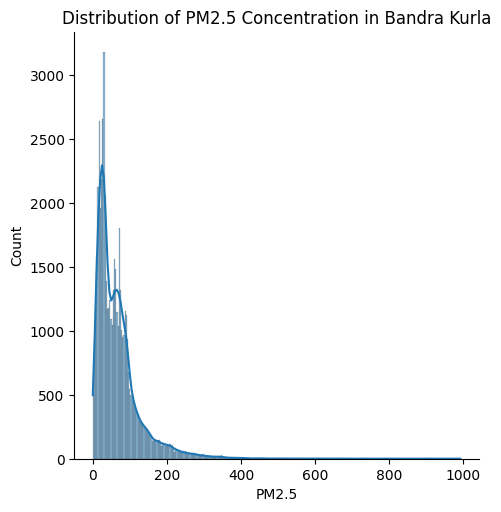

In [3]:
sns.displot(data = air, x="PM2.5", kde=True)
plt.title('Distribution of PM2.5 Concentration in Bandra Kurla')
plt.show()

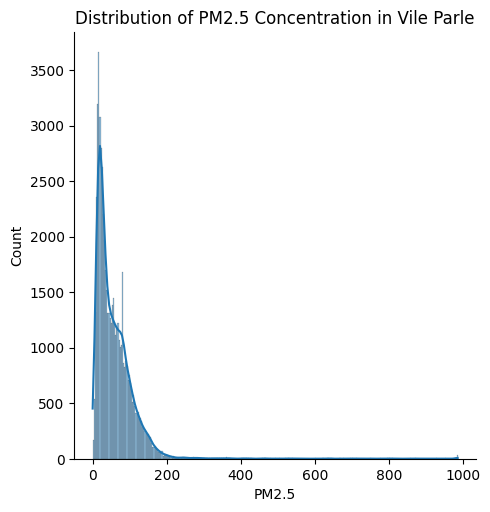

In [4]:
sns.displot(data = air2, x="PM2.5", kde=True)
plt.title('Distribution of PM2.5 Concentration in Vile Parle')
plt.show()

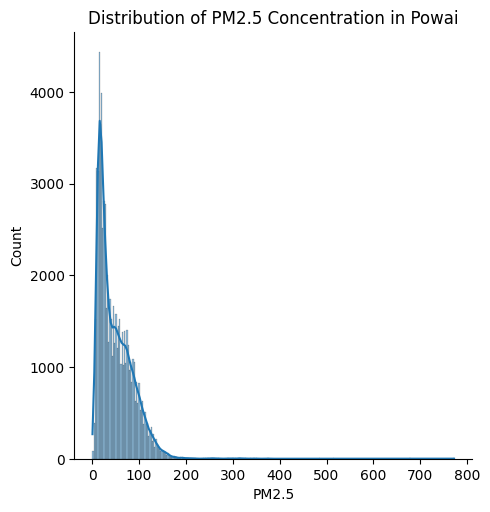

In [5]:
sns.displot(data = air3, x="PM2.5", kde=True)
plt.title('Distribution of PM2.5 Concentration in Powai')
plt.show()

We compare the displots of the three regions, Bandra Kurla, Vile Parle and Powai and list the observations:
1) PM2.5 concentrations exceeding 200 are notably more frequent in Bandra Kurla compared to Powai and Vile Parle.
2) In Powai, a substantial number of PM2.5 concentration readings (40,000+) are clustered around a value of approximately 10. In contrast, the other regions show concentrations around 10 with counts ranging from 3000 to 3500 in each.
   

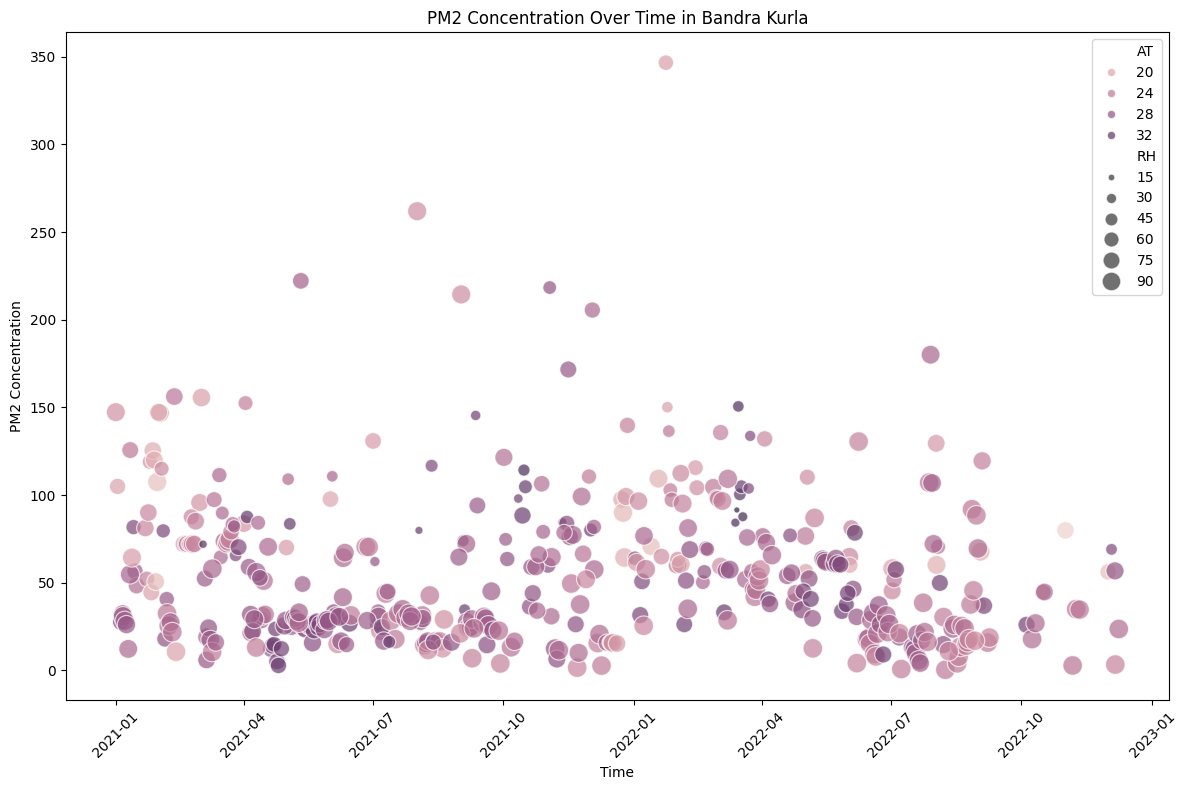

In [6]:
# Convert 'From Date' and 'To Date' to datetime format
air['From Date'] = pd.to_datetime(air['From Date'])
air['To Date'] = pd.to_datetime(air['To Date'])

# Calculate mean time between 'From Date' and 'To Date'
air['Mean Time'] = (air['From Date'] + (air['To Date'] - air['From Date']) / 2)

# Downsample for visualization clarity
air = air[::100]

# Drop rows with NaN values in 'AT' (Air Temperature) and 'RH' (Relative Humidity)
air_cleaned = air.dropna(subset=['AT', 'RH'])

# Create a bubble plot using Seaborn
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=air_cleaned, x='Mean Time', y='PM2.5', size='RH', hue='AT', sizes=(20, 200), alpha=0.7)

# Formatting the plot
plt.xlabel('Time')
plt.ylabel('PM2 Concentration')
plt.title('PM2 Concentration Over Time in Bandra Kurla')
plt.xticks(rotation=45)

# Create a ScalarMappable for the colorbar
cmap = plt.cm.viridis  # Choose a colormap (e.g., viridis)
norm = plt.Normalize(air_cleaned['AT'].min(), air_cleaned['AT'].max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for the colorbar

# Add color bar legend
# cbar = plt.colorbar(sm, ax=scatter.axes, label='Air Temperature')

plt.tight_layout()
plt.show()

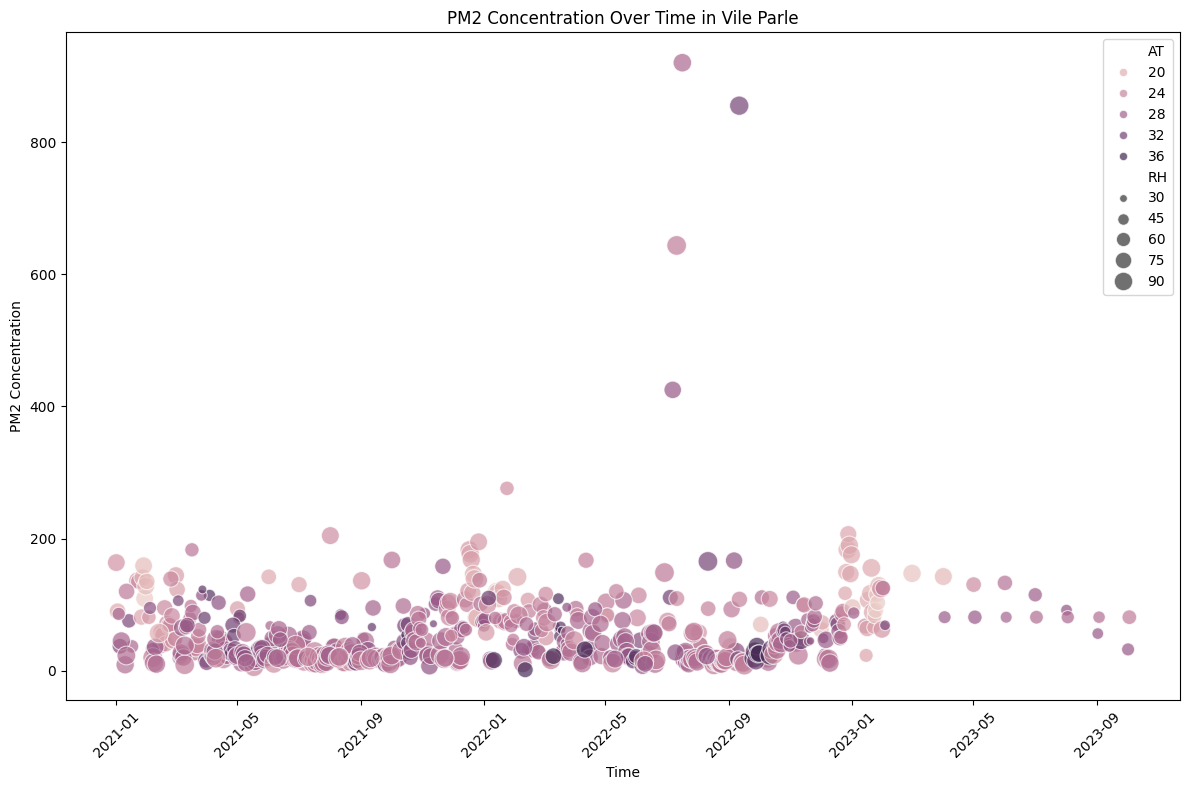

In [7]:
# Convert 'From Date' and 'To Date' to datetime format
air2['From Date'] = pd.to_datetime(air2['From Date'])
air2['To Date'] = pd.to_datetime(air2['To Date'])

# Calculate mean time between 'From Date' and 'To Date'
air2['Mean Time'] = (air2['From Date'] + (air2['To Date'] - air2['From Date']) / 2)

# Downsample for visualization clarity
air2 = air2[::100]

# Drop rows with NaN values in 'AT' (Air Temperature) and 'RH' (Relative Humidity)
air_cleaned = air2.dropna(subset=['AT', 'RH'])

# Create a bubble plot using Seaborn
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=air_cleaned, x='Mean Time', y='PM2.5', size='RH', hue='AT', sizes=(20, 200), alpha=0.7)

# Formatting the plot
plt.xlabel('Time')
plt.ylabel('PM2 Concentration')
plt.title('PM2 Concentration Over Time in Vile Parle')
plt.xticks(rotation=45)

# Create a ScalarMappable for the colorbar
cmap = plt.cm.viridis  # Choose a colormap (e.g., viridis)
norm = plt.Normalize(air_cleaned['AT'].min(), air_cleaned['AT'].max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for the colorbar

# Add color bar legend
# cbar = plt.colorbar(sm, ax=scatter.axes, label='Air Temperature')

plt.tight_layout()
plt.show()

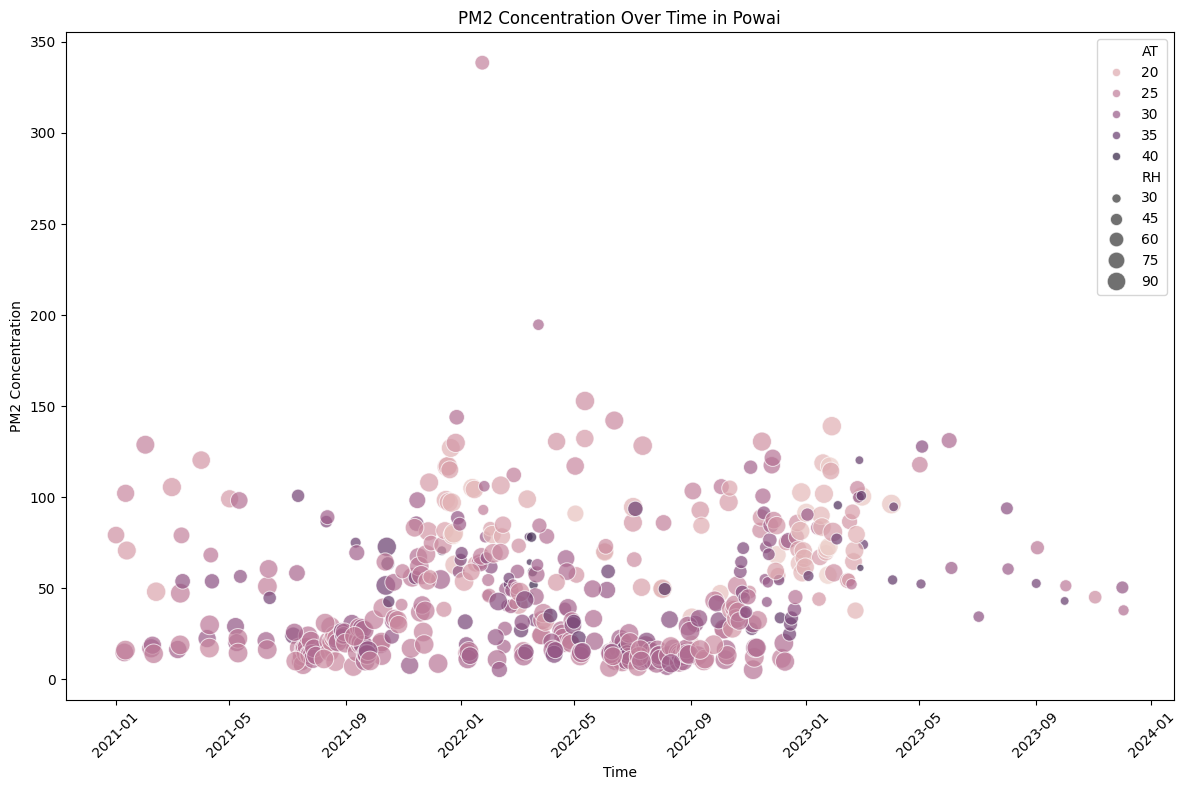

In [8]:
# Convert 'From Date' and 'To Date' to datetime format
air3['From Date'] = pd.to_datetime(air3['From Date'])
air3['To Date'] = pd.to_datetime(air3['To Date'])

# Calculate mean time between 'From Date' and 'To Date'
air3['Mean Time'] = (air3['From Date'] + (air3['To Date'] - air3['From Date']) / 2)

# Downsample for visualization clarity
air3 = air3[::100]

# Drop rows with NaN values in 'AT' (Air Temperature) and 'RH' (Relative Humidity)
air_cleaned = air3.dropna(subset=['AT', 'RH'])

# Create a bubble plot using Seaborn
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=air_cleaned, x='Mean Time', y='PM2.5', size='RH', hue='AT', sizes=(20, 200), alpha=0.7)

# Formatting the plot
plt.xlabel('Time')
plt.ylabel('PM2 Concentration')
plt.title('PM2 Concentration Over Time in Powai')
plt.xticks(rotation=45)

# Create a ScalarMappable for the colorbar
cmap = plt.cm.viridis  # Choose a colormap (e.g., viridis)
norm = plt.Normalize(air_cleaned['AT'].min(), air_cleaned['AT'].max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for the colorbar

# Add color bar legend
#cbar = plt.colorbar(sm, ax=scatter.axes, label='Air Temperature')

plt.tight_layout()
plt.show()

We draw the following inferences from the scatter plot of the three regions:
1) There is an inverse relationship between relative humidity and PM2.5 concentration, where higher relative humidity levels correspond to lower PM2.5 concentrations.
2) Observing the data, higher air temperatures are associated with lower PM2.5 values, indicating a potential negative correlation between air temperature and PM2.5 concentration.
3) Among the three regions, Vile Parle exhibits the highest PM2.5 concentration, with a peak value of around 800, significantly surpassing the peaks in the other regions, which are approximately 350.

<Figure size 1200x800 with 0 Axes>

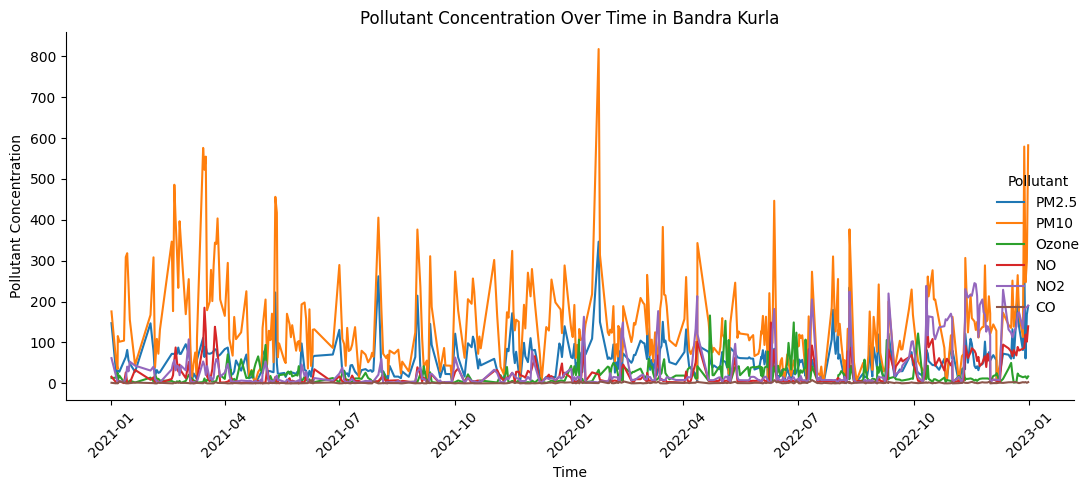

In [9]:
# Drop rows with NaN values in pollutants
pollutants = ['PM2.5', 'PM10', 'Ozone', 'NO', 'NO2', 'CO']
air_cleaned = air.loc[:70000]
air_cleaned = air_cleaned.dropna(subset=pollutants)

# Melt the DataFrame to long format for Seaborn
air_melted = air_cleaned.melt(id_vars=['Mean Time'], value_vars=pollutants, var_name='Pollutant', value_name='Concentration')

# Create a relational plot (relplot) using Seaborn
plt.figure(figsize=(12, 8))
sns.relplot(data=air_melted, x='Mean Time', y='Concentration', hue='Pollutant', kind='line', markers=True, aspect=2)
# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Pollutant Concentration')
plt.title('Pollutant Concentration Over Time in Bandra Kurla')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

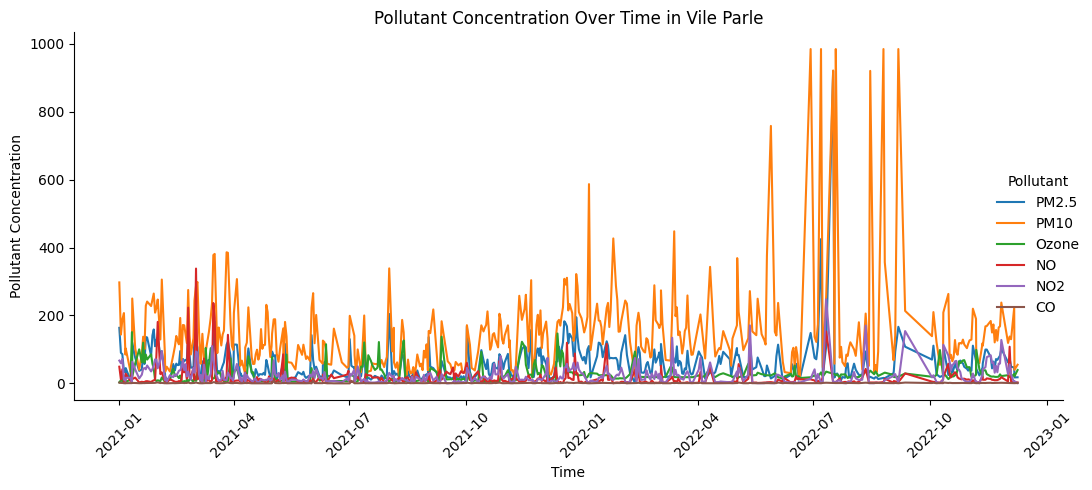

In [10]:
# Drop rows with NaN values in pollutants
pollutants = ['PM2.5', 'PM10', 'Ozone', 'NO', 'NO2', 'CO']
air_cleaned = air2.loc[:70000]
air_cleaned = air_cleaned.dropna(subset=pollutants)

# Melt the DataFrame to long format for Seaborn
air_melted = air_cleaned.melt(id_vars=['Mean Time'], value_vars=pollutants, var_name='Pollutant', value_name='Concentration')

# Create a relational plot (relplot) using Seaborn
plt.figure(figsize=(12, 8))
sns.relplot(data=air_melted, x='Mean Time', y='Concentration', hue='Pollutant', kind='line', markers=True, aspect=2)
# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Pollutant Concentration')
plt.title('Pollutant Concentration Over Time in Vile Parle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

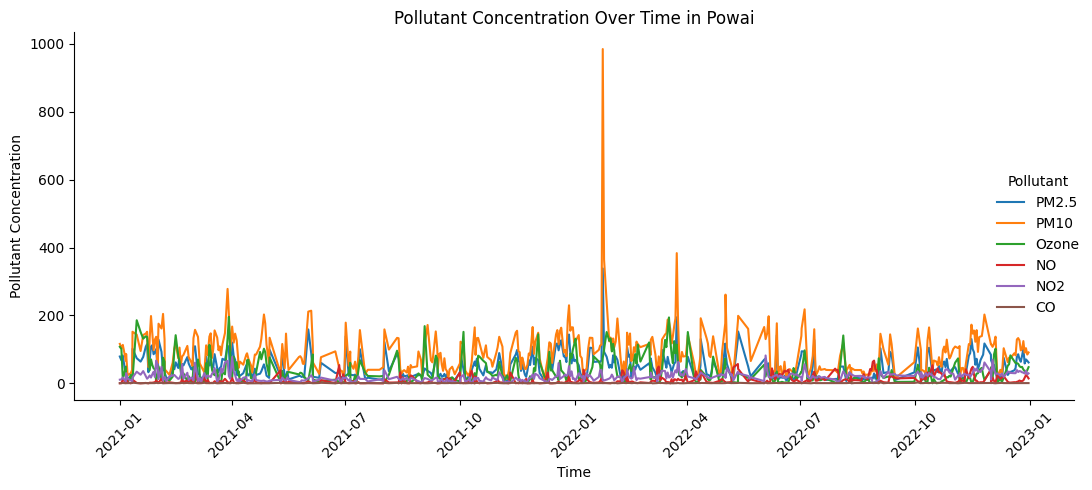

In [11]:
# Drop rows with NaN values in pollutants
pollutants = ['PM2.5', 'PM10', 'Ozone', 'NO', 'NO2', 'CO']
air_cleaned = air3.loc[:70000]
air_cleaned = air_cleaned.dropna(subset=pollutants)

# Melt the DataFrame to long format for Seaborn
air_melted = air_cleaned.melt(id_vars=['Mean Time'], value_vars=pollutants, var_name='Pollutant', value_name='Concentration')

# Create a relational plot (relplot) using Seaborn
plt.figure(figsize=(12, 8))
sns.relplot(data=air_melted, x='Mean Time', y='Concentration', hue='Pollutant', kind='line', markers=True, aspect=2)
# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Pollutant Concentration')
plt.title('Pollutant Concentration Over Time in Powai')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above relational plot of the pollution concerntration of different regions of Mumbai for different components of air, we conclude that the concerntration of NO is least and that of the PM10 is maximum. Also the visual representation shows that the pollution concerntration of the particulate matter is maximum in the winter i.e. around January- February. Around the Monsoon season, the concerntration of pollutants is minimum.

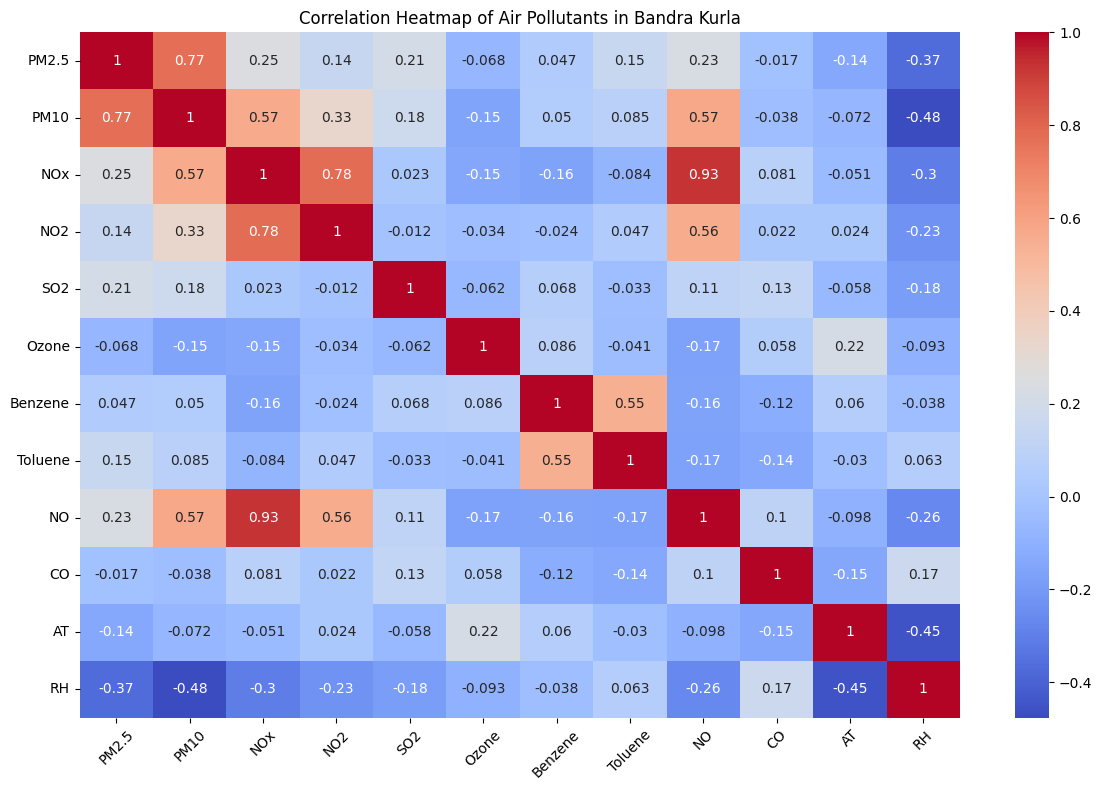

In [12]:
# Filter data for NO and CO concentrations
no_co_data = air[['PM2.5', 'PM10', 'NOx', 'NO2', 'SO2', 'Ozone', 'Benzene', 'Toluene', 'NO', 'CO', 'AT', 'RH']].dropna()

# Pivot the data for heatmap plotting
# print(no_co_data.corr())

# Create a heatmap of correlation coefficients using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(data=no_co_data.corr(), annot=True, cmap='coolwarm')

# Formatting the plot
plt.title('Correlation Heatmap of Air Pollutants in Bandra Kurla')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

From the correlation plot we can conclude that there is very strong correlation between PM10 and PM2.5, i.e. as we keep increasing the PM10, PM2.5 will also increase. Alos there is very strong correlation between NO and NOX. SO2 and Ozone & CO and Relative humidity have a weak negative correlation this means that there is a slight tendency for these two pollutants to have opposite levels. When the concentration of SO2/CO increases, the concentration of Ozone/RH tends to decrease, and vice versa

Text(0.5, 1.0, 'Box Plot of concentration of pollutants in Bandra Kurla')

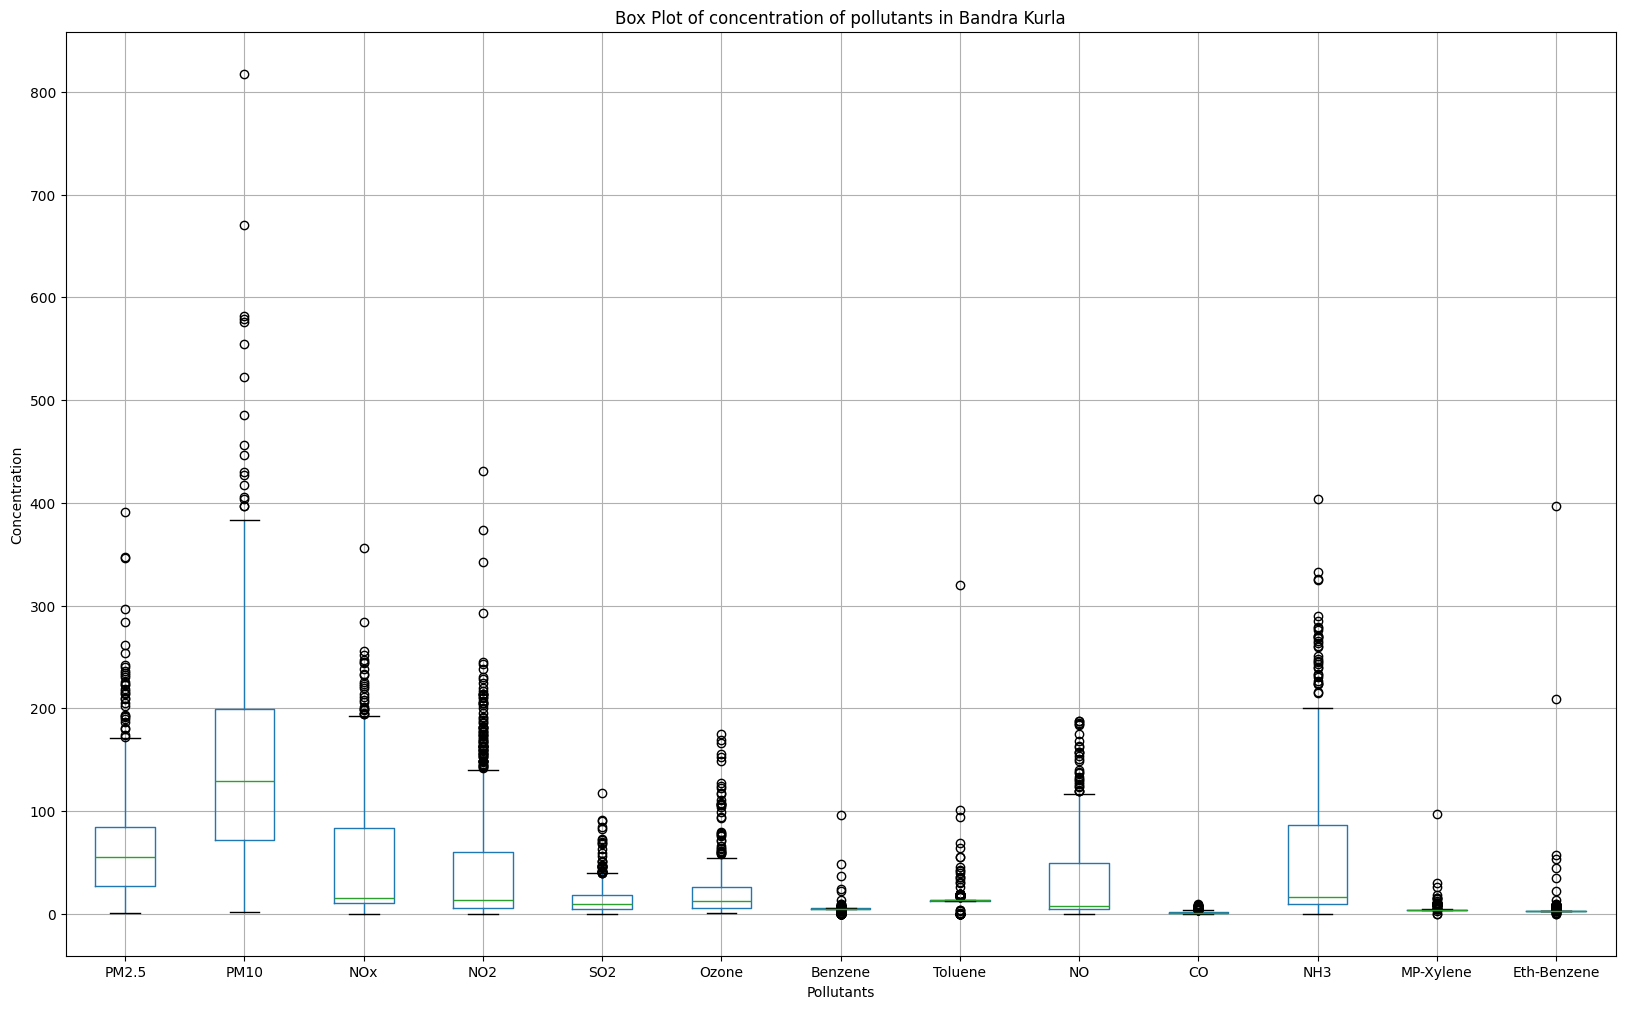

In [13]:
fig, ax = plt.subplots(figsize=(20, 12))
air_poll = air[['PM2.5', 'PM10', 'NOx', 'NO2', 'SO2', 'Ozone', 'Benzene', 'Toluene', 'NO', 'CO', 'NH3', 'MP-Xylene', 'Eth-Benzene']]
air_poll.boxplot(ax=ax) 
ax.set_xlabel('Pollutants')
ax.set_ylabel('Concentration')
ax.set_title('Box Plot of concentration of pollutants in Bandra Kurla')

Text(0.5, 1.0, 'Box Plot of concentration of pollutants in Vile Parle')

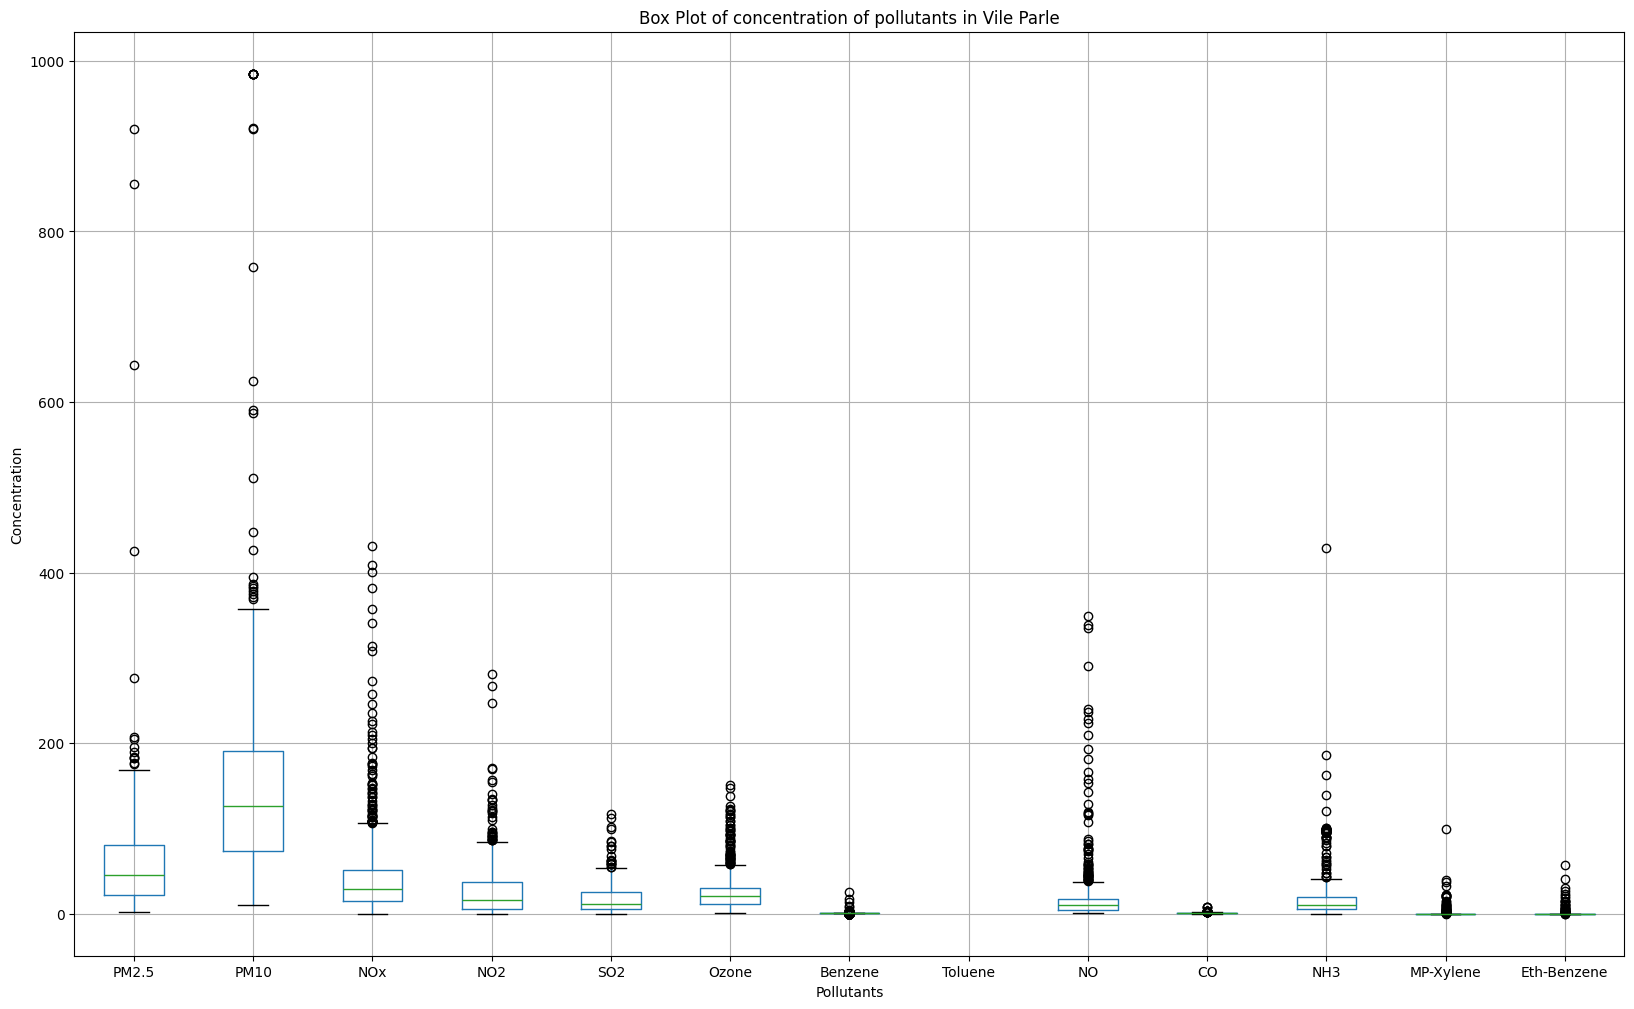

In [14]:
fig, ax = plt.subplots(figsize=(20, 12))
air_poll = air2[['PM2.5', 'PM10', 'NOx', 'NO2', 'SO2', 'Ozone', 'Benzene', 'Toluene', 'NO', 'CO', 'NH3', 'MP-Xylene', 'Eth-Benzene']]
air_poll.boxplot(ax=ax) 
ax.set_xlabel('Pollutants')
ax.set_ylabel('Concentration')
ax.set_title('Box Plot of concentration of pollutants in Vile Parle')

Text(0.5, 1.0, 'Box Plot of concentration of pollutants in Powai')

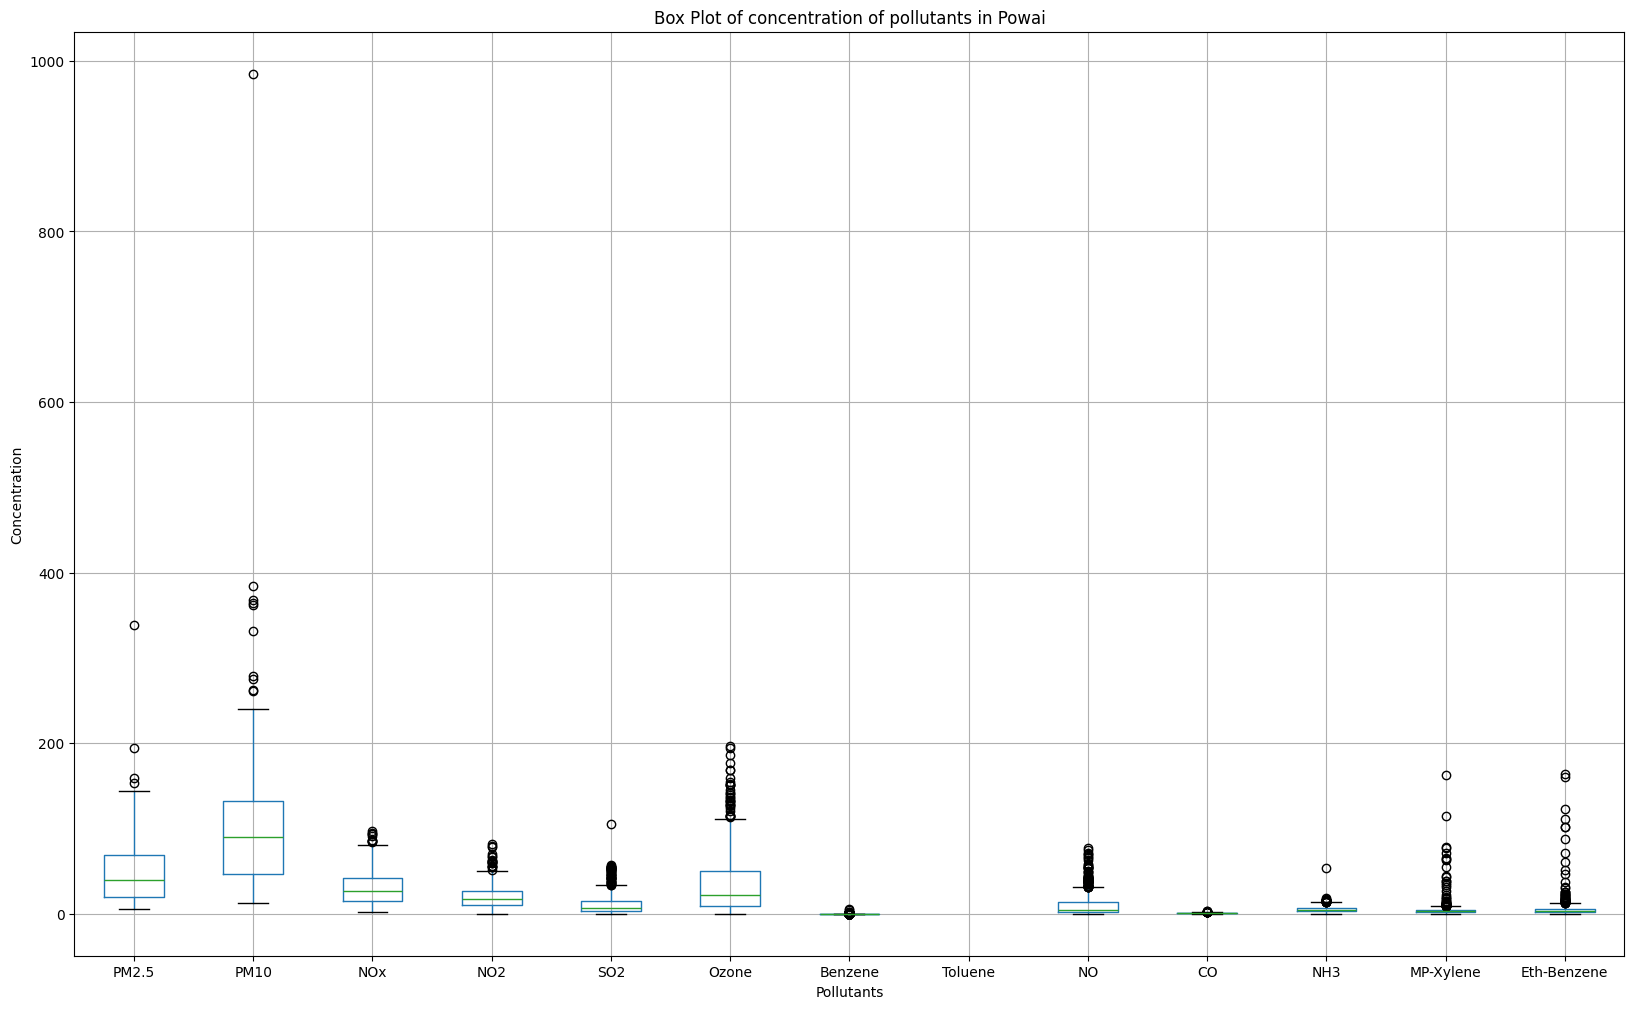

In [15]:
fig, ax = plt.subplots(figsize=(20, 12))
air_poll = air3[['PM2.5', 'PM10', 'NOx', 'NO2', 'SO2', 'Ozone', 'Benzene', 'Toluene', 'NO', 'CO', 'NH3', 'MP-Xylene', 'Eth-Benzene']]
air_poll.boxplot(ax=ax) 
ax.set_xlabel('Pollutants')
ax.set_ylabel('Concentration')
ax.set_title('Box Plot of concentration of pollutants in Powai')

The boxplots of the following three regions comparing the pollutants concerntration vs the pollutants we come to know that variation of data of Benzene and CO is very less while at  the same time the spread of middle 50% data of PM10 is the largest  i.e. mean of PM10 is more than any other pollutant with some of the outliers having very high values and lying very far away from the 100% values of the box plots. 

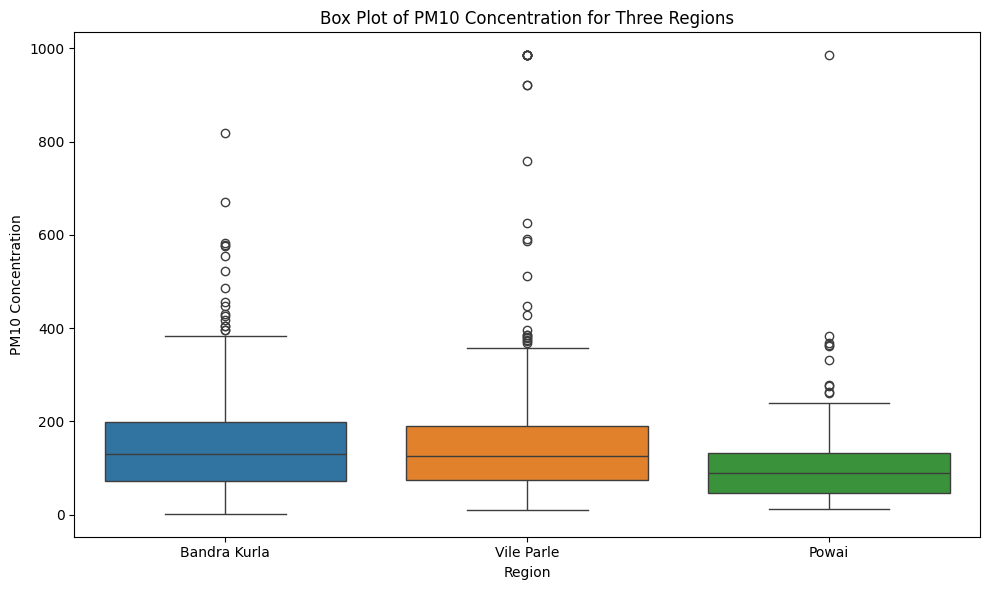

In [16]:
combined_df = pd.concat([air['PM10'], air2['PM10'], air3['PM10']], axis=1)
combined_df.columns = ['Bandra Kurla', 'Vile Parle', 'Powai']

# Create a box plot for PM10 concentration by region using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df)
plt.xlabel('Region')
plt.ylabel('PM10 Concentration')
plt.title('Box Plot of PM10 Concentration for Three Regions')

plt.tight_layout()
plt.show()

We draw the following inferences from the PM10 concentration box plot of the three regions
1) The 25th percentile values of PM10 concentration in Powai are lower than those in Vile Parle and Bandra Kurla, indicating generally lower PM10 levels at the lower end of the concentration range in Powai.
2) The median value of PM10 concentration in Powai is the lowest among the three regions, suggesting that the central tendency of PM10 levels is comparatively lower in Powai.
3) The interquartile range (IQR) or inter-quartile spread, which represents the spread of the middle 50% of the data, appears to be similar across the three regions, indicating consistent variability in PM10 concentration levels within this range across the regions.

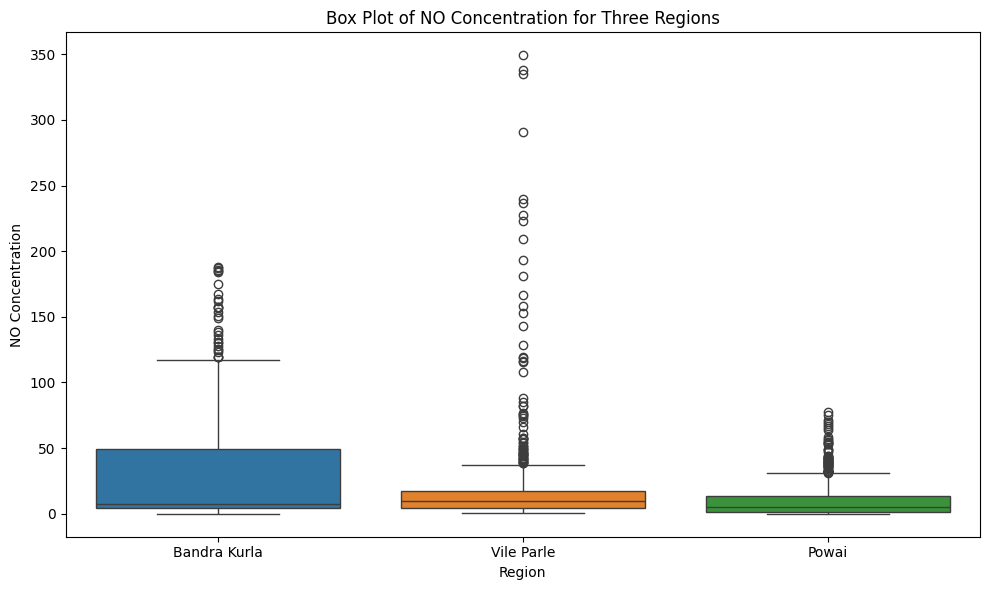

In [17]:
combined_df = pd.concat([air['NO'], air2['NO'], air3['NO']], axis=1)
combined_df.columns = ['Bandra Kurla', 'Vile Parle', 'Powai']

plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df)
plt.xlabel('Region')
plt.ylabel('NO Concentration')
plt.title('Box Plot of NO Concentration for Three Regions')

plt.tight_layout()
plt.show()

We draw the following inferences from Box Plot of NO readings in different regions
1) The 75th percentile and maximum (100th percentile) values of NO concentration in Bandra Kurla are the highest among the three regions, indicating potentially higher pollution levels.
2) Vile Parle exhibits several outliers in NO readings, suggesting occasional spikes or unusual high concentration levels of NO in this region.
3) The interquartile range (spread) of NO readings is wider in Bandra Kurla compared to the other regions, indicating a greater variation in NO concentrations in Bandra Kurla.

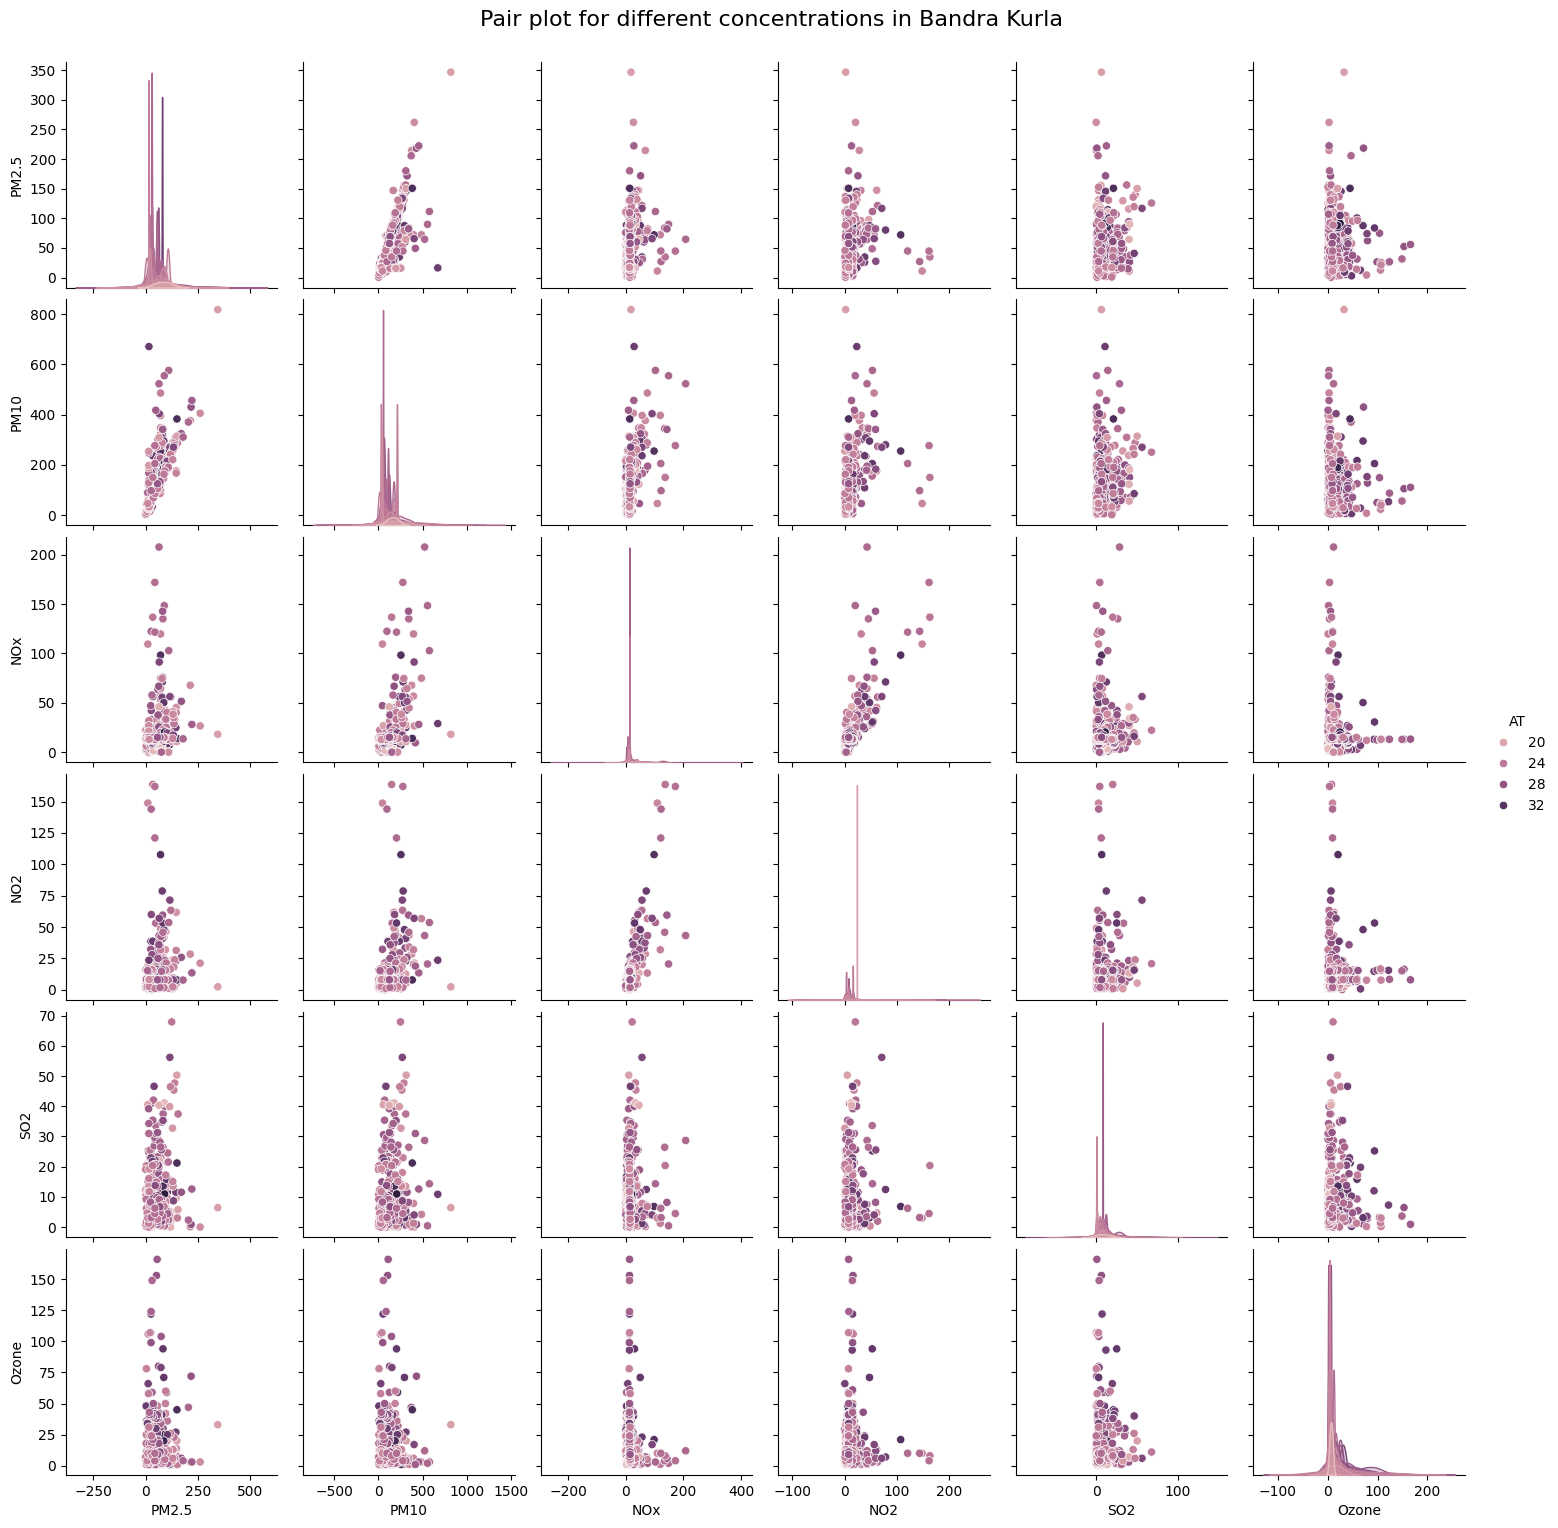

In [18]:
sns.pairplot(air, hue='AT', vars=['PM2.5', 'PM10', 'NOx', 'NO2', 'SO2', 'Ozone'])
plt.suptitle("Pair plot for different concentrations in Bandra Kurla", y=1.02, fontsize=16)
plt.show()

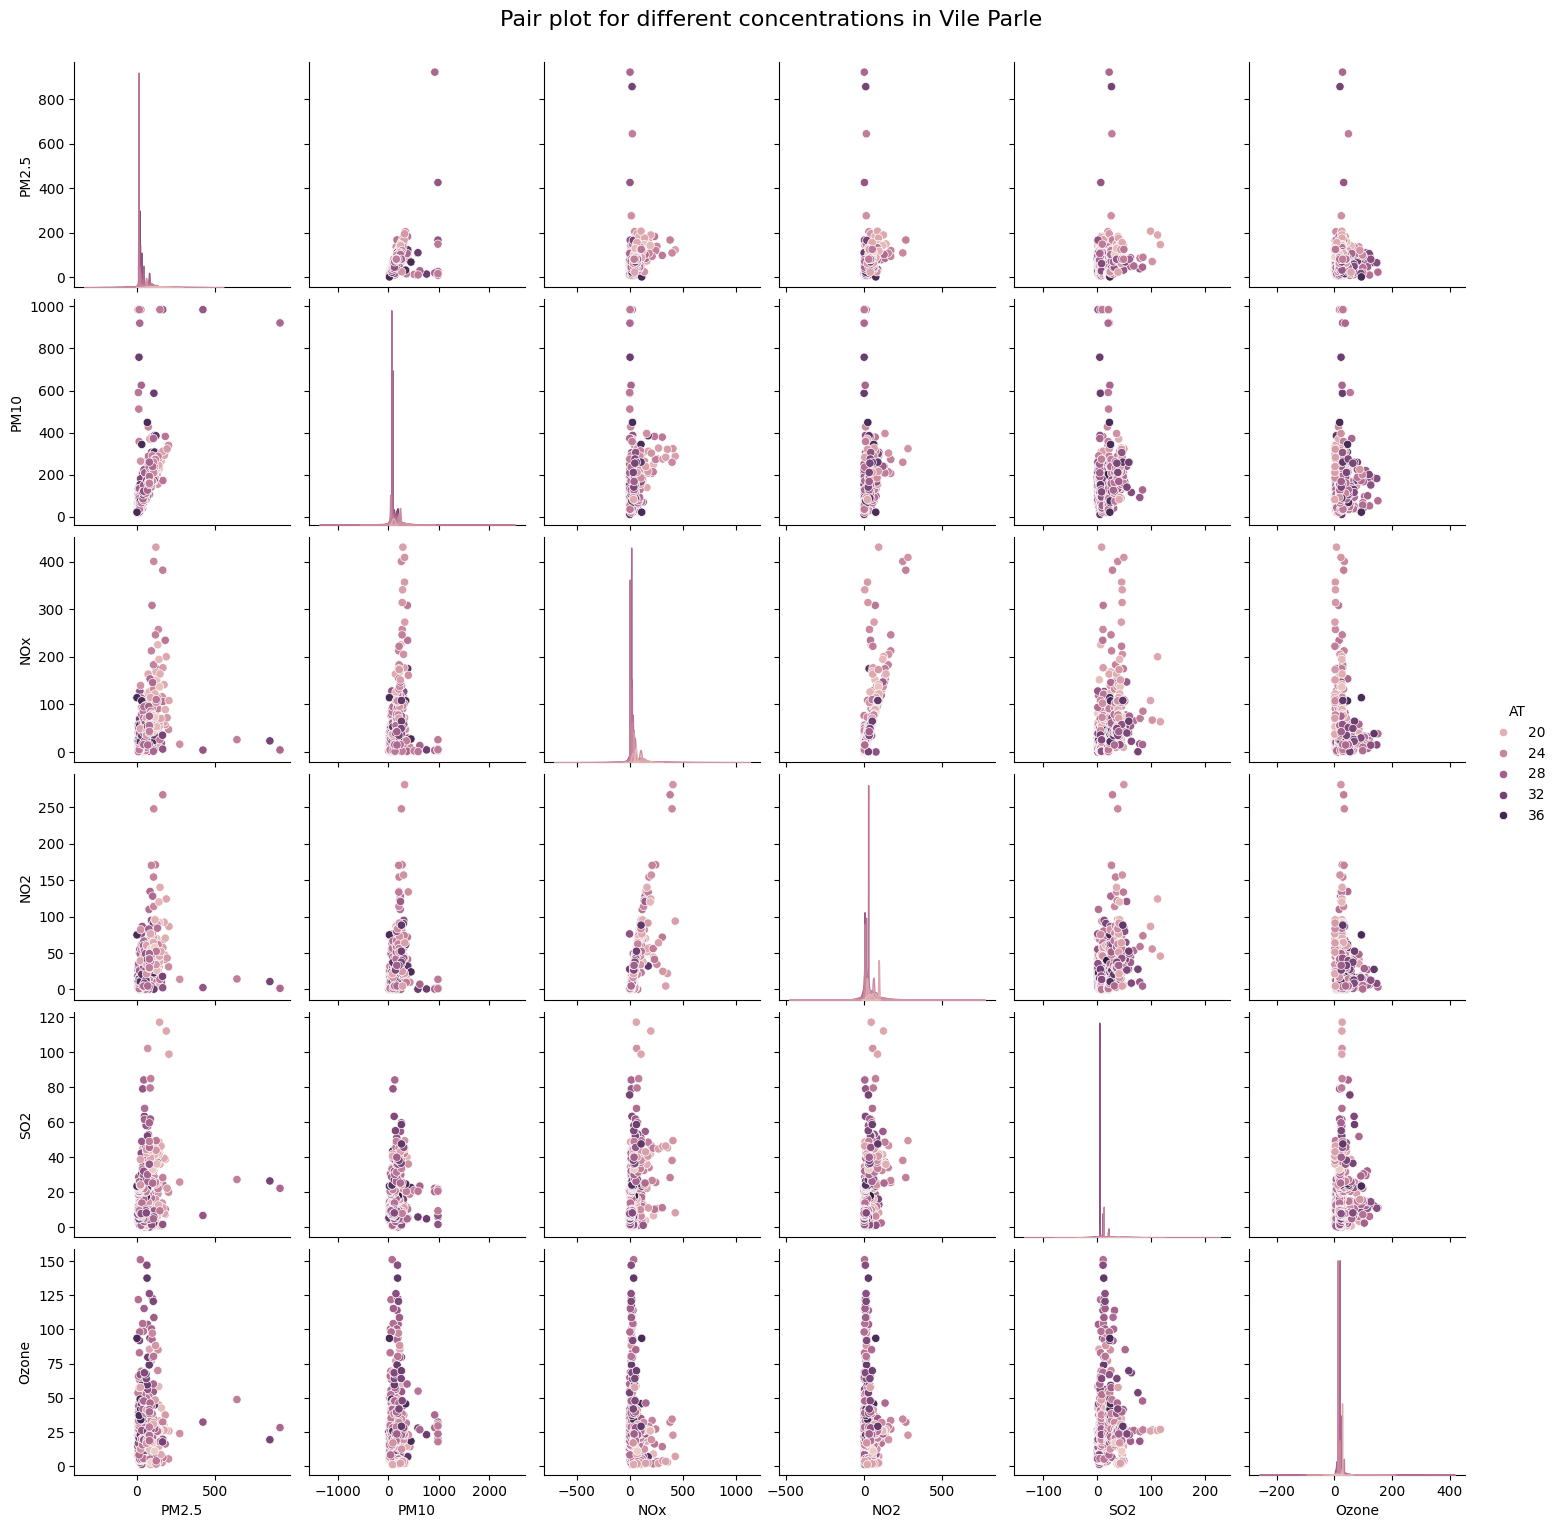

In [19]:
sns.pairplot(air2, hue='AT', vars=['PM2.5', 'PM10', 'NOx', 'NO2', 'SO2', 'Ozone'])
plt.suptitle("Pair plot for different concentrations in Vile Parle", y=1.02, fontsize=16)
plt.show()

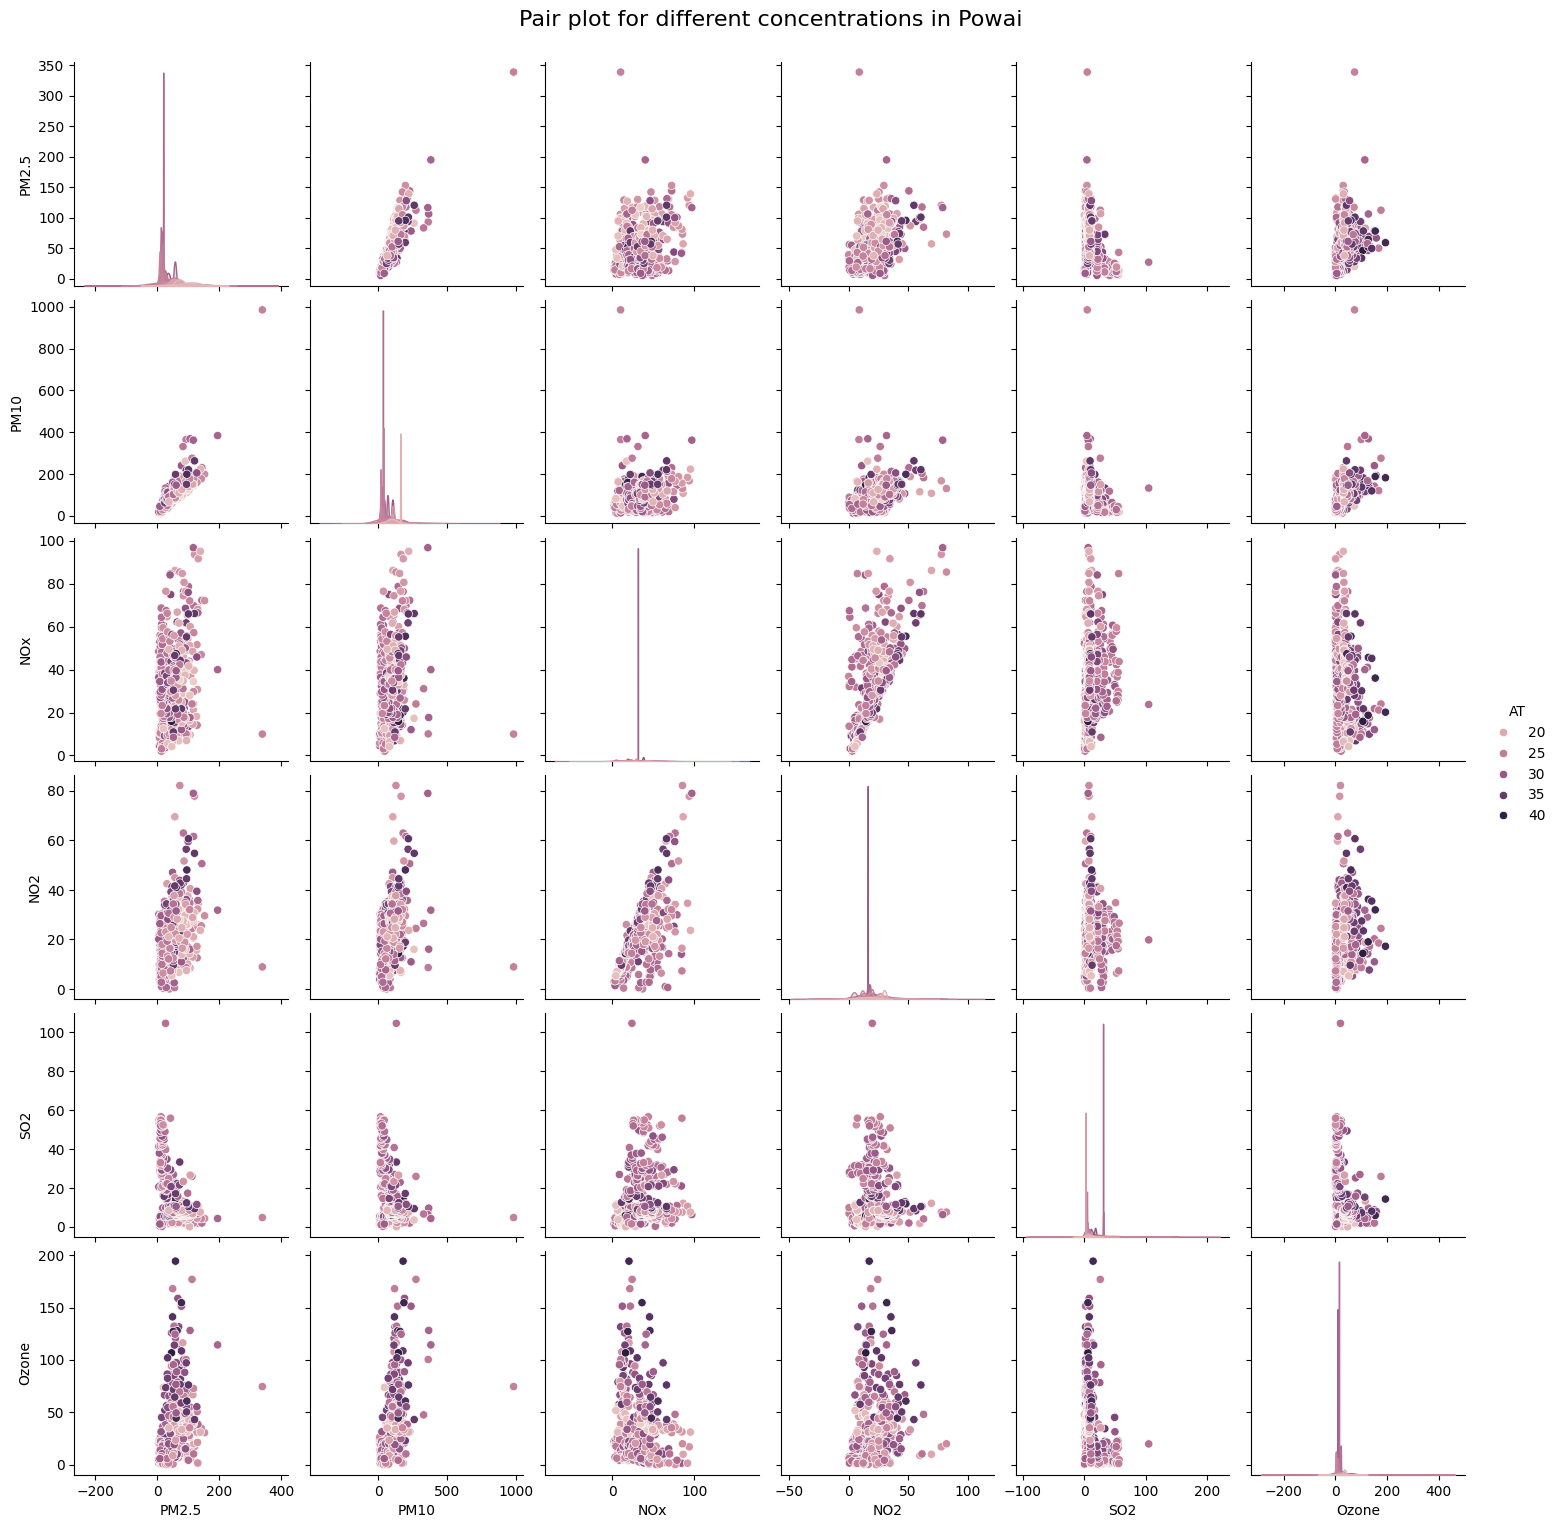

In [20]:
sns.pairplot(air3, hue='AT', vars=['PM2.5', 'PM10', 'NOx', 'NO2', 'SO2', 'Ozone'])
plt.suptitle("Pair plot for different concentrations in Powai", y=1.02, fontsize=16)
plt.show()

We draw the following inferences from the pair plot:
1) Variation of any two pollutants show a similar pattern in the three regions
2) We observe coorelation of any two pollutants with corresponding air temperature at that point

# Best Fit between Relative Humidity(RH) and Temperature

In [21]:
data = pd.read_csv("archive/BandraMumbaiMPCB.csv")

In [22]:
data.drop('Toluene', axis=1, inplace=True)
data.drop(data.columns[0], axis=1, inplace=True)

data = data.dropna()

In [23]:
# Independent Random variable = Temperature
# Dependent Random variable = Relative Humidity (RH)

sample_data = data.sample(n=2000, random_state=42)

temperature = sample_data["Temp"]
Rel_Humidity = sample_data["RH"]

temperature = np.array(temperature)
Rel_Humidity = np.array(Rel_Humidity)

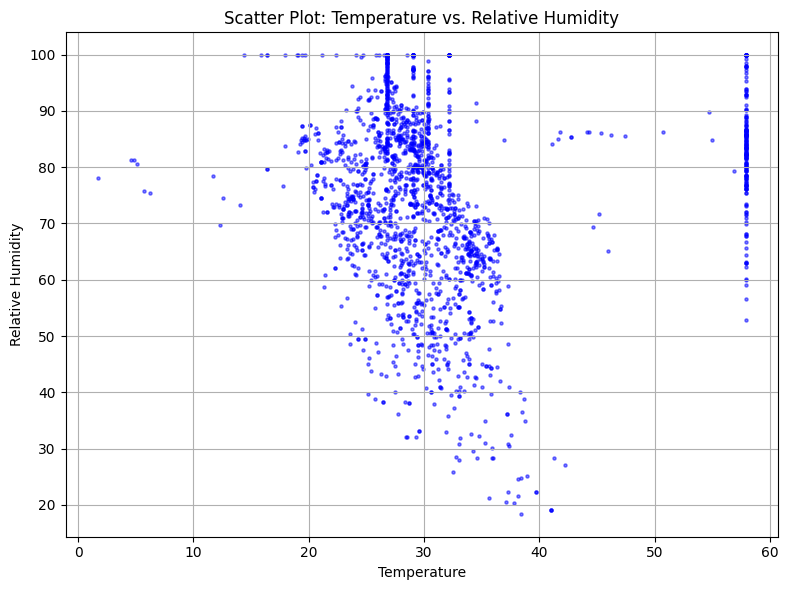

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(temperature, Rel_Humidity, color='blue', alpha=0.5, s = 5)

plt.xlabel('Temperature')
plt.ylabel('Relative Humidity')
plt.title('Scatter Plot: Temperature vs. Relative Humidity')

plt.grid(True)
plt.tight_layout()
plt.show()

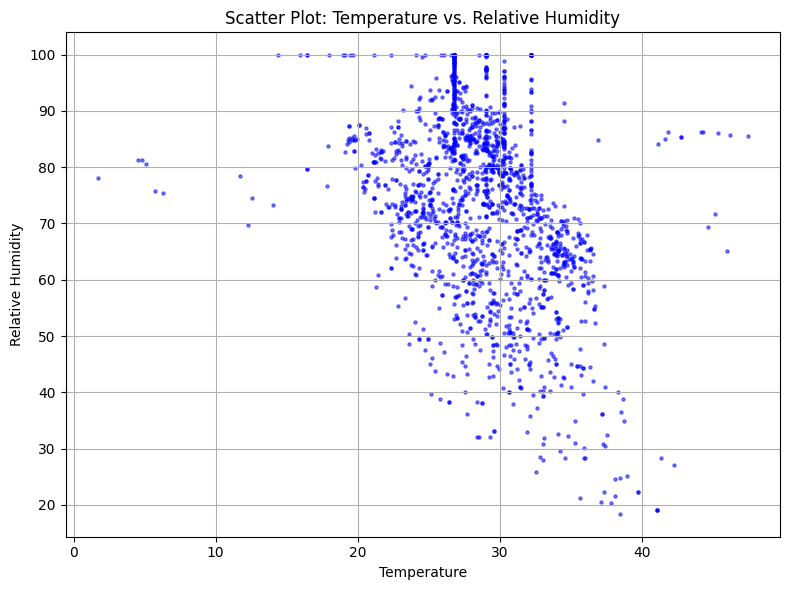

In [25]:
# Removing Outliers

indices_to_delete = np.where(temperature > 50)[0]

temp= np.delete(temperature, indices_to_delete)
rel_humid = np.delete(Rel_Humidity, indices_to_delete)

plt.figure(figsize=(8, 6))
plt.scatter(temp, rel_humid, color='blue', alpha=0.5, s = 5)

plt.xlabel('Temperature')
plt.ylabel('Relative Humidity')
plt.title('Scatter Plot: Temperature vs. Relative Humidity')

plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# Calculating A and B  
# For this regression Part We've used Mathematical approach discussed in Class to Find A and B hence the best fit line

mean_temp = np.mean(temp)
mean_humid = np.mean(rel_humid)
num = 0                                                  # num is numerator for the expression we use to calculate B
den = -len(temp)*(mean_temp**2)                          # den is denominator for the expression we use to calculate A

for i in range(len(temp)):
    num = num + (temp[i] - mean_temp)*rel_humid[i]
    den = den + (temp[i]**2) 

B = num/den
A = mean_humid - B*mean_temp

In [27]:
y_fit = A + B*(temp)

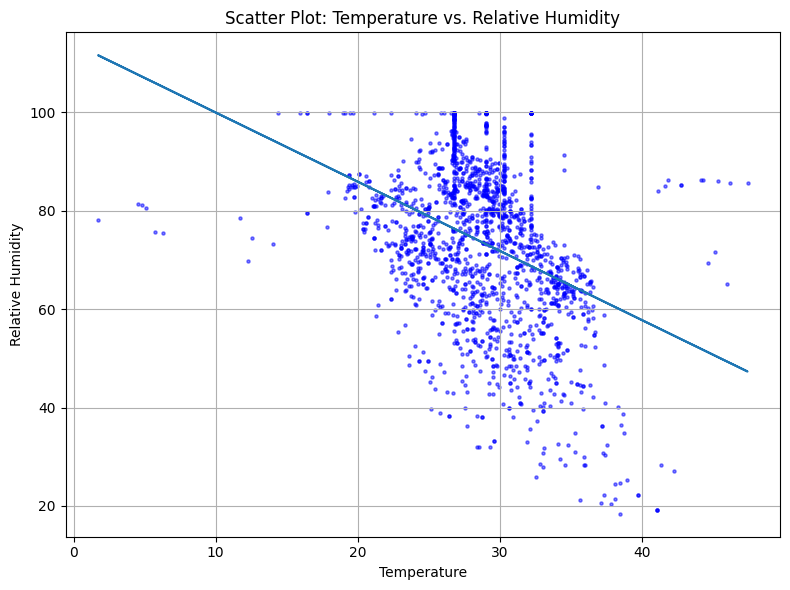

In [28]:
#Plotting the Best Fit

plt.figure(figsize=(8, 6))
plt.scatter(temp, rel_humid, color='blue', alpha=0.5, s = 5)
plt.plot(temp, y_fit)
plt.xlabel('Temperature')
plt.ylabel('Relative Humidity')
plt.title('Scatter Plot: Temperature vs. Relative Humidity')

plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
#Calculating Coefficient of Determination

Syy = 0
SSR = 0
for i in range(len(rel_humid)):
    Syy = Syy + (rel_humid[i] - mean_humid)**2
    SSR = SSR + (rel_humid[i] - A - B*temp[i])**2

R2 = 1 - (SSR/Syy)    # R2 is the coefficient of Determination

print(R2)

0.14131888066145204


It seems there's not very much dependence between Relative humidity and Temperature

# Seasonal Variation of a Gas

In [30]:
# Random Variable = Concentration of gases like NO, NO2 and concentration of particles having 2.5 or 10 micron diameter


#squeezing large data to 12 discrete datas, representing one data element for each month

month = data['From Date'].str[5:7]
month = np.array(month)
month = pd.to_numeric(month, errors='coerce')

compare = 2
new_data = pd.DataFrame(data.iloc[0, 2:9])
new_data = new_data.T
for i in range(len(month)):
    if month[i]==compare:
        temporary = pd.DataFrame(data.iloc[i, 2:9])
        temporary = temporary.T
        new_data = pd.concat([new_data,temporary], axis=0)
        compare = compare + 1

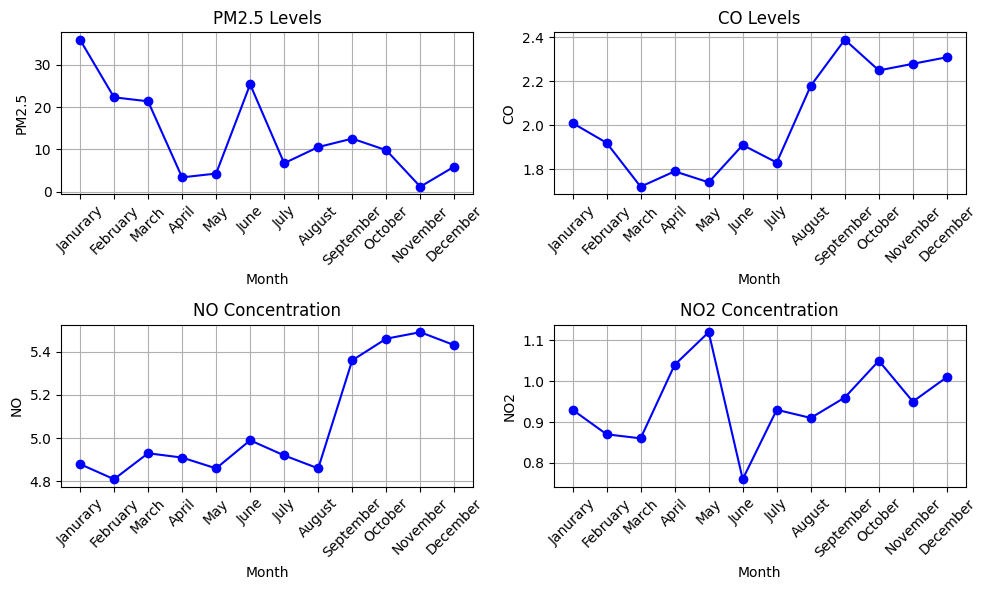

In [31]:
months = ["Janurary", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

pm25 = np.array(new_data.iloc[:, 0]).flatten()
co = np.array(new_data.iloc[:, 6]).flatten()
NO = np.array(new_data.iloc[:, 2]).flatten()
NO2 = np.array(new_data.iloc[:, 3]).flatten()

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Plot PM2.5
axs[0, 0].plot(months, pm25, marker='o', color='blue', linestyle='-')
axs[0, 0].set_title('PM2.5 Levels')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('PM2.5')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot PM10
axs[0, 1].plot(months, co, marker='o', color='blue', linestyle='-')
axs[0, 1].set_title('CO Levels')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('CO')
axs[0, 1].grid(True)
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot NO
axs[1, 0].plot(months, NO, marker='o', color='blue', linestyle='-')
axs[1, 0].set_title('NO Concentration')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('NO')
axs[1, 0].grid(True)
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot NO2
axs[1, 1].plot(months, NO2, marker='o', color='blue', linestyle='-')
axs[1, 1].set_title('NO2 Concentration')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('NO2')
axs[1, 1].grid(True)
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From the above data we can infer thay, For Region around Bandra (in Mumbai) , NO concentration is found more in later months of the Year, that is September to December (i.e During the **Winter**)

However, NO2 concentration is found high during **Summer** (march - April) with a sharp dropdown during the Months of June

Similarly, concentration of CO increases substantially during later half of the year (August - December)

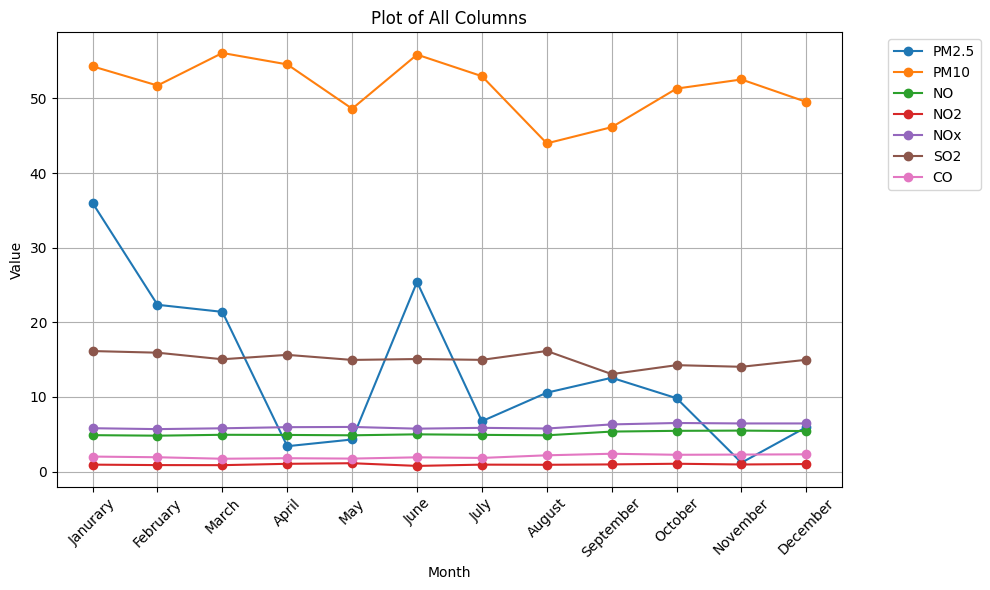

In [32]:
# Analyzing Variation of all the gases simultaneously

plt.figure(figsize=(10, 6))

for column in new_data.columns:
    plt.plot(months, new_data[column], marker='o', label=column)

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Plot of All Columns')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


We can also make parallel compareisons between the concentration, 

Despite of All the variations, Concentration of **PM10** is largest among all four followed by **PM2.5**, which explains dust particles having **10 microns diameter** have the largest concentration in the air (in Bandra) followed by particles having **2.5 microns of diameter**.

For most of the months, 2.5 microns diameter particles have higher concentration as compared to other gases like **NO2** and **NO**, however this difference gets less during the **Winter** months (also for few months, concentration of gases were found more than 2.5 micron diamter particles)

In [33]:
parameters = pd.DataFrame({
    'PM2.5': pm25,
    'CO': co,
    'NO': NO,
    'NO2': NO2
})

# Calculate the correlation matrix
correlation_matrix = parameters.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          PM2.5        CO        NO       NO2
PM2.5  1.000000 -0.198201 -0.409826 -0.630566
CO    -0.198201  1.000000  0.801932  0.113496
NO    -0.409826  0.801932  1.000000  0.266899
NO2   -0.630566  0.113496  0.266899  1.000000


From this we can also understand correlation of One gas with other during the Year 2021 in Bandra

# AQI Calculation

In [34]:

def calculate_aqi(pm25_concentration):
    # Setting up some default parameters 
    
    breakpoints = [
        (0, 12, 0, 50),    
        (12.1, 35.4, 51, 100),  
        (35.5, 55.4, 101, 150), 
        (55.5, 150.4, 151, 200), 
        (150.5, 250.4, 201, 300), 
        (250.5, 350.4, 301, 400), 
        (350.5, 500.4, 401, 500)  
    ]

    # Determining range of your pm2.5 concentration
    for (pm_low, pm_high, aqi_low, aqi_high) in breakpoints:
        if pm_low <= pm25_concentration <= pm_high:
            # Calculating AQI using its Linear Relationship with Concentration of PM2.5 under some approximations
            aqi = ((aqi_high - aqi_low) / (pm_high - pm_low)) * (pm25_concentration - pm_low) + aqi_low
            return round(aqi)

    # If the PM2.5 concentration is above the highest range, set AQI to 500 (Because its the maximum an AQI can go)
    if pm25_concentration > 500.4:
        return 500

    # If the PM2.5 concentration is below the lowest range, set AQI to 0 (its the minimum an AQI can go)
    if pm25_concentration < 0:
        return 0

                 
AQI = np.array([])       #an array to story aqi values

PM_25 = data['PM2.5']
PM_25 = np.array(PM_25)

for i in range(len(PM_25)):
    p25_value = PM_25[i]
    aqi_value = calculate_aqi(p25_value)
    AQI = np.append(AQI,aqi_value)

AQI = pd.to_numeric(AQI,errors='coerce')

Indices with NaN values in AQI: [False False False ... False False False]


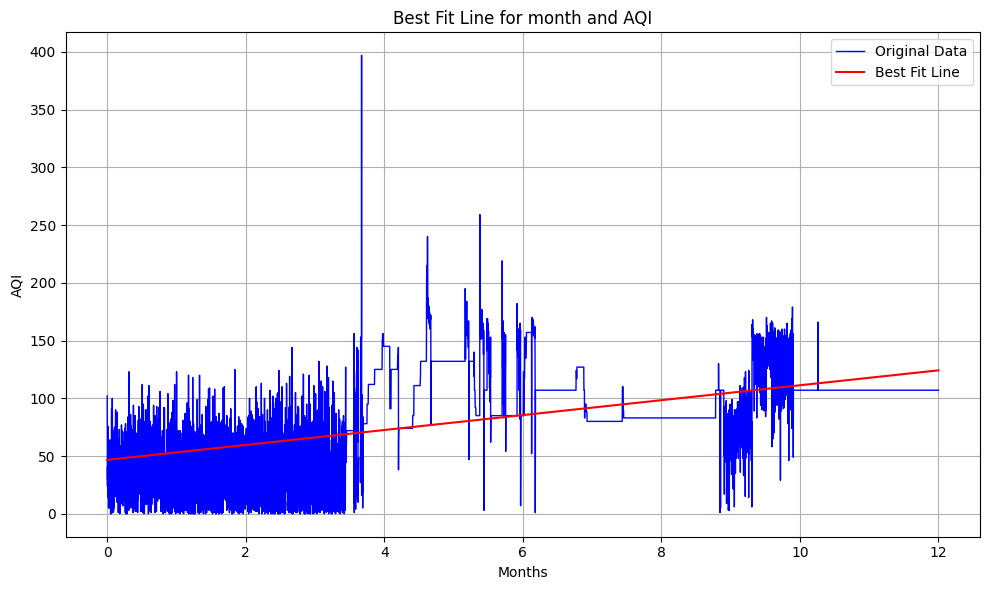

In [35]:
# Importing Linear Regression inbuilt function from sklearn to plot best fit between months and AQI value (because actual data is very noisy)
from sklearn.linear_model import LinearRegression

# Given data has uniform range for all the months hence we can make rough approximation that each month will have roughly the same number of data points
x = np.linspace(0,12,len(AQI))
# Check for NaN values in AQI array
nan_indices = np.isnan(AQI)
print("Indices with NaN values in AQI:", nan_indices)

# Remove NaN values from both x and AQI arrays
x_clean = x[~nan_indices]
AQI_clean = AQI[~nan_indices]

# Reshape the array x_clean to ensure it has a single column if it is one-dimensional
# This is done to ensure compatibility with certain functions that expect a two-dimensional array
x_clean = x_clean.reshape(-1, 1) if len(x_clean.shape) == 1 else x_clean

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the clean data
model.fit(x_clean, AQI_clean)

# Get the best fit line
best_fit_line = model.predict(x_clean)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_clean, AQI_clean, color='blue', label='Original Data', linewidth=1)                 # plot actual data
plt.plot(x_clean, best_fit_line, color='red', linestyle='-', label='Best Fit Line')      # plot Best fit
plt.xlabel('Months')
plt.ylabel('AQI')
plt.title('Best Fit Line for month and AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


From the above Plot, we can infer that, AQI increases in the later half of the Year (near winter)

Another good relation we can draw is, From the previous analysis we already know Concentration of NO/NO2 also increases almost during the same period by a very large amount, Probably this sudden increase in Concentration of Nitrogen compounds in bandra might be the reason of Increased AQI

( **Interesting Fact:** During 2017 and 2019 at Global Meet Conducted by EPA and NIOSH respectively, it was discussed Nitrogen gases can be key contributers  to Degrade the Quality of Air if found in large amount )



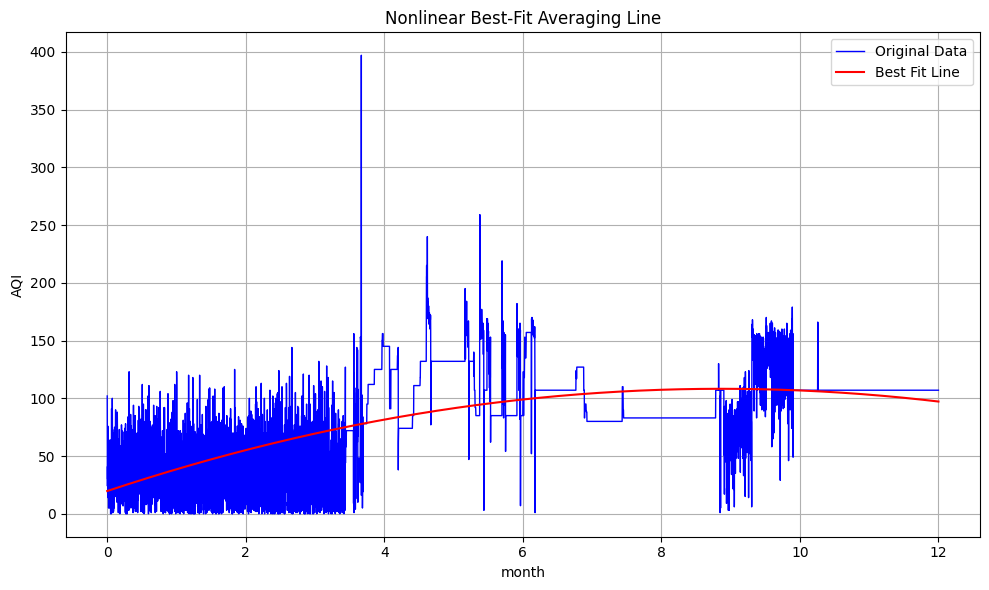

In [36]:
# We can also draw a non-linear cuve (regressing data to a poolynomial) using inbuilt funcrions like curve_fit from scipy for a better observation

from scipy.optimize import curve_fit


valid_indices = ~np.isnan(AQI)

# Filter AQI array to keep only non-NaN values
AQI = AQI[valid_indices]

x = np.linspace(0, 12, len(AQI))

# Define a polynomial coefficients of which we'll generate after doing regression
def nonlinear_function(x, a, b, c): 
    return a * x**2 + b * x + c           #lets just take quadratic to not make things complicated
 
# Perform curve fitting to find the parameters of the nonlinear function
params, _ = curve_fit(nonlinear_function, x, AQI)

# Generate y-values for the best-fit line using the fitted parameters
best_fit_line = nonlinear_function(x, *params)

# Plot the original data and the best-fit line
plt.figure(figsize=(10, 6))
plt.plot(x, AQI, color='blue', label='Original Data', linewidth=1)
plt.plot(x, best_fit_line, color='red', linestyle='-', label='Best Fit Line')
plt.xlabel('month')
plt.ylabel('AQI')
plt.title('Nonlinear Best-Fit Averaging Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# BootStrapping

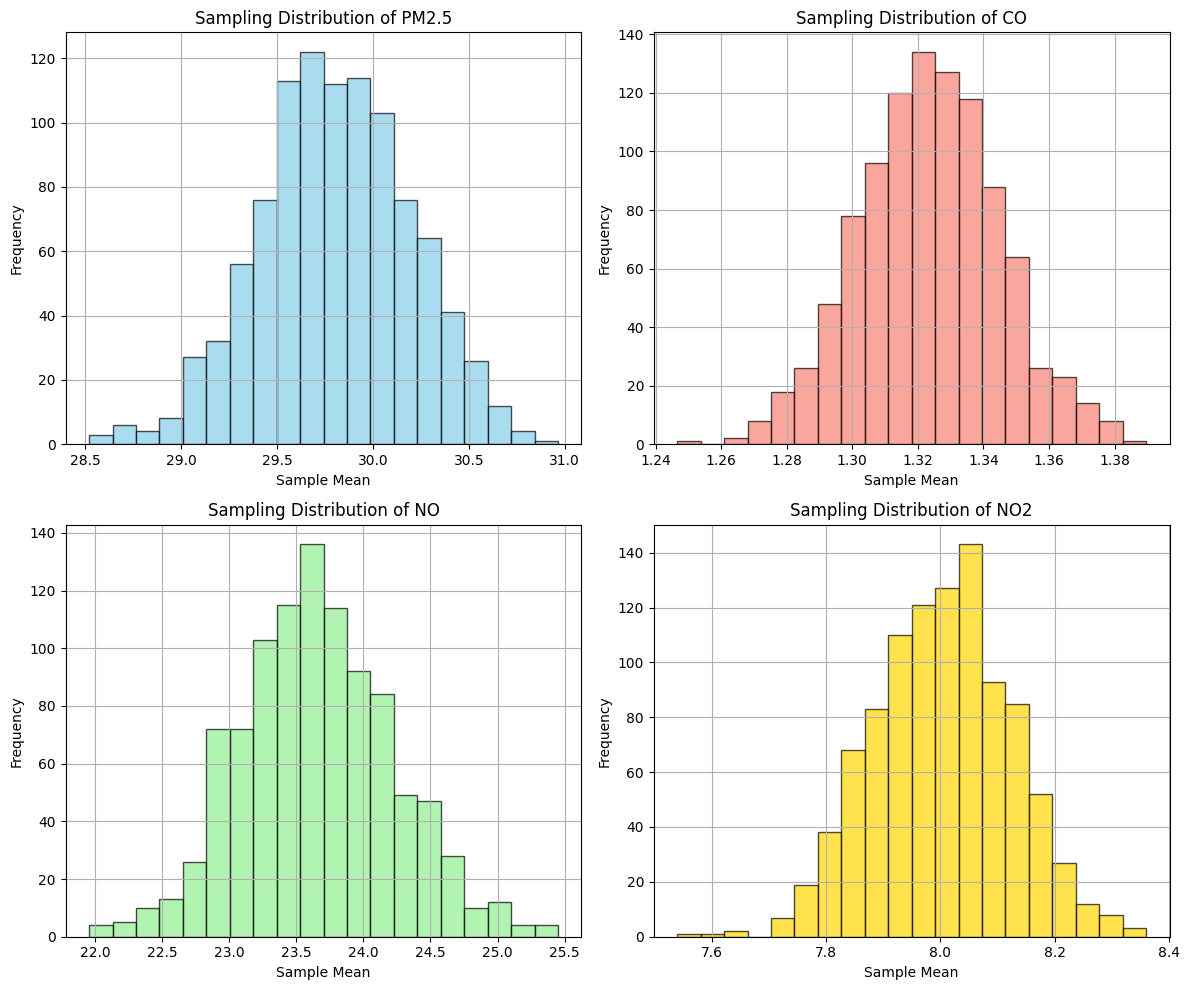

In [37]:
PM25 = data['PM2.5']
CO = data['CO']
NO = data['NO']
NO2 = data['NO2']

sample_size = 2000
num_samples = 1000

sample_means_pm25 = np.zeros(num_samples)
sample_means_co = np.zeros(num_samples)
sample_means_no = np.zeros(num_samples)
sample_means_no2 = np.zeros(num_samples)

for i in range(num_samples):
    sample_PM25 = np.random.choice(PM25, size=sample_size, replace=True)
    sample_CO = np.random.choice(CO, size=sample_size, replace=True)
    sample_NO = np.random.choice(NO, size=sample_size, replace=True)
    sample_NO2 = np.random.choice(NO2, size=sample_size, replace=True)
    
    sample_means_pm25[i] = np.mean(sample_PM25)
    sample_means_co[i] = np.mean(sample_CO)
    sample_means_no[i] = np.mean(sample_NO)
    sample_means_no2[i] = np.mean(sample_NO2)
    

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot sampling distribution for PM2.5
axs[0, 0].hist(sample_means_pm25, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axs[0, 0].set_title('Sampling Distribution of PM2.5')
axs[0, 0].set_xlabel('Sample Mean')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(True)

# Plot sampling distribution for CO
axs[0, 1].hist(sample_means_co, bins=20, color='salmon', edgecolor='black', alpha=0.7)
axs[0, 1].set_title('Sampling Distribution of CO')
axs[0, 1].set_xlabel('Sample Mean')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

# Plot sampling distribution for NO
axs[1, 0].hist(sample_means_no, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axs[1, 0].set_title('Sampling Distribution of NO')
axs[1, 0].set_xlabel('Sample Mean')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

# Plot sampling distribution for NO2
axs[1, 1].hist(sample_means_no2, bins=20, color='gold', edgecolor='black', alpha=0.7)
axs[1, 1].set_title('Sampling Distribution of NO2')
axs[1, 1].set_xlabel('Sample Mean')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

### By central limit theorm we see that the distribution resembles normal distribution

**1. Calculating Confidence interval for PM2.5**

In [38]:
PM25 = data['PM2.5']       
average_values = []

# Repeat the process 1000 times
for i in range(1000):
    # Generate a sample of 100 values by sampling from the math_column with replacement
    sample = np.random.choice(PM25, size=100, replace=True)
    
    # Calculate the average of the sample and append it to the list
    average_values.append(np.mean(sample))

average_values = np.array(average_values) #converting average_values to a numpy array

# Calculating the 2.5th and 97.5th percentiles
lower_bound_2 = np.percentile(average_values, 2.5)
upper_bound_2 = np.percentile(average_values, 97.5)

# Print the confidence interval for PM2.5 concentration
print("95% Confidence Interval for PM2.5 Concentration of Population:")
print("Lower Bound:", lower_bound_2)
print("Upper Bound:", upper_bound_2)

95% Confidence Interval for PM2.5 Concentration of Population:
Lower Bound: 25.999427499999996
Upper Bound: 33.490962499999995


In [39]:
# We can confirm by calculating Populaton mean if it lies in the Confidence interval or not
print(np.mean(PM25))

29.811677628443427


Hence, 95% confidence for PM2.5 is (26.42 , 33.40 ) whereas actual value of population mean is 29.811 which actually lies in the interval

**2. Calculating Confidence interval for NO**

In [40]:
NO = data['NO']       
average_values = []

# Repeat the process 1000 times
for i in range(1000):
    # Generate a sample of 100 values by sampling from the math_column with replacement
    sample = np.random.choice(NO, size=100, replace=True)
    
    # Calculate the average of the sample and append it to the list
    average_values.append(np.mean(sample))

average_values = np.array(average_values) #converting average_values to a numpy array

# Calculating the 2.5th and 97.5th percentiles
lower_bound_2 = np.percentile(average_values, 2.5)
upper_bound_2 = np.percentile(average_values, 97.5)

# Print the confidence interval for NO concentration
print("95% Confidence Interval for NO Concentration of Population:")
print("Lower Bound:", lower_bound_2)
print("Upper Bound:", upper_bound_2)

95% Confidence Interval for NO Concentration of Population:
Lower Bound: 18.843322500000003
Upper Bound: 28.626274999999996


# Hypothesis Testing

In [41]:
# Reading data files 
file_path_powai = 'archive\PowaiMumbaiMPCB.csv'
df = pd.read_csv(file_path_powai)
columns_to_drop_powai = [0,13,19,-1] 
df_powai = df.drop(df.columns[columns_to_drop_powai], axis=1)

file_path_kurla ='archive\KurlaMumbaiMPCB.csv'
df = pd.read_csv(file_path_kurla)
columns_to_drop_kurla = [0,13,19,-1,-3] 
df_kurla =  df.drop(df.columns[columns_to_drop_kurla], axis=1)

In [42]:
# Calculating AQI for Powai
AQI_Powai = []
pm25_powai = df_powai['PM2.5']

for i in range(len(pm25_powai)):
    pm25_value = calculate_aqi(pm25_powai[i])
    AQI_Powai.append(pm25_value)

#adding new column for AQI
df_powai['AQI'] = AQI_Powai
print("SAMPLE DATA OF POWAI")
df_powai.head()

SAMPLE DATA OF POWAI


From Date              To Date  PM2.5    PM10    NO    NO2  \
0  2021-01-01 00:00:00  2021-01-01 00:15:00  79.18  116.33  0.36  10.86   
1  2021-01-01 00:15:00  2021-01-01 00:30:00  75.00  107.00  0.53   9.04   
2  2021-01-01 00:30:00  2021-01-01 00:45:00  75.00  107.00  1.02  10.77   
3  2021-01-01 00:45:00  2021-01-01 01:00:00  75.00  107.00  1.47  17.84   
4  2021-01-01 01:00:00  2021-01-01 01:15:00  76.40  107.44  1.46  17.81   

     NOx   NH3   SO2    CO   Ozone  Benzene  Eth-Benzene  MP-Xylene     RH  \
0  11.22  7.79  5.72  0.41  107.72     0.29         2.54       3.02  81.92   
1   9.58  7.64  5.52  0.41  104.27     1.13         2.48       3.16  81.07   
2  11.79  7.78  6.18  0.53   98.05     0.04         1.08       8.34  81.93   
3  19.33  8.12  6.69  0.60   86.91     0.33         2.99       6.28  84.22   
4  19.28  8.57  6.40  0.59   83.05     0.00         2.28       3.95  86.68   

     WS      WD     AT    AQI  
0  0.29  240.22  22.92  163.0  
1  0.32  255.07  22.86  161.0  
2  0.29  277.83  22.72  161.0  
3  0.34  282.00  22.70  161.0  
4  0.25  248.79  22.74  162.0

In [43]:
# Calculating AQI OF KURLA
AQI_Kurla = []
pm25_kurla = df_kurla['PM2.5']

for i in range(len(pm25_kurla)):
    pm25_value = calculate_aqi(pm25_kurla[i])
    AQI_Kurla.append(pm25_value)

df_kurla['AQI'] = AQI_Kurla
print("SAMPLE DATA FOR KURLA")
df_kurla.head()

SAMPLE DATA FOR KURLA


From Date              To Date   PM2.5    PM10      NO    NO2  \
0  2021-01-01 00:00:00  2021-01-01 00:15:00  150.00  330.21   92.03  25.09   
1  2021-01-01 00:15:00  2021-01-01 00:30:00  150.00  398.00  101.03  23.89   
2  2021-01-01 00:30:00  2021-01-01 00:45:00  150.00  398.00  113.79  22.28   
3  2021-01-01 00:45:00  2021-01-01 01:00:00  164.42  398.00  126.27  22.24   
4  2021-01-01 01:00:00  2021-01-01 01:15:00  209.00  459.16  131.90  22.61   

      NOx    NH3    SO2    CO  Ozone  Benzene  Eth-Benzene  MP-Xylene     RH  \
0  117.14  38.31  37.22  2.61   6.09     8.96        23.30       0.59  68.43   
1  124.94  37.90  38.60  2.37   2.39     7.89        21.85       0.68  69.30   
2  136.06  36.74  40.23  2.38   7.27    10.31        31.43        NaN  71.45   
3  148.53  28.61  36.52  2.16   5.37    12.82        27.64      11.98  76.18   
4  154.51  24.13  33.75  1.78   2.40    10.90        11.90      32.39  80.07   

     WS      WD     AT    AQI  
0  0.59  156.02  23.10  200.0  
1  0.50  189.30  22.74  200.0  
2  0.49  238.31  22.77  200.0  
3  0.73  292.77  22.53  215.0  
4  0.53  248.84  22.19  259.0

## Hypothesis Testing 1
### Random Variable :  AQI 

<p> We want to study if AQI in Powai is less as compared to rest of the city and for comparision we are slecting Kurla
<p> To achieve this we perform a two sided Z test on the distribution with unknow and unequal variance

### Null Hypothesis   H0 : µx - µy <= 0  versus 
### Alternate Hypothesis H1 : µx - uy > 0

### where ux is mean AQI for Powai and uy is mean AQI for Kurla

<p> Significannce level 0.05 

In [44]:
# finding lengths 
len_powai = len(pm25_powai)
len_kurla = len(pm25_kurla)

# Calculate Sample Means 
Sample_Mean_AQI_Powai = df_powai['AQI'].mean()
Sample_Mean_AQI_Kurla = df_kurla['AQI'].mean()

#print(Sample_Mean_AQI_Powai,Sample_Mean_AQI_Kurla)

#Calculate Sample Standard Deviations
Sample_SD_AQI_Powai =  df_powai['AQI'].std(ddof = 1)
Sample_SD_AQI_Kurla =  df_kurla['AQI'].std(ddof =1)

#print(Sample_SD_AQI_Powai,Sample_Mean_AQI_Kurla)
## As n and m are large we can approximate the distribution of unknown and unequal variances as a standard Z distribution


# Calculate the test statistic TS
TS = (Sample_Mean_AQI_Powai - Sample_Mean_AQI_Kurla)/(np.sqrt((Sample_SD_AQI_Powai**2)/len_powai +(Sample_SD_AQI_Kurla**2)/len_kurla))

print("Test Statistic Value: ",TS)
Significance_alpha = 0.025
confidence = 1 - Significance_alpha

# finding Z value corresponding to the required N and alpha
z_value = stats.norm.ppf(confidence)

print("Value of Z alpha: ",z_value)

Test Statistic Value:  14.492135783920247
Value of Z alpha:  1.959963984540054


#### As TS > Z alpha, It lies in the critical region and therefore we reject the Null Hypothesis and conclude that AQI is powai is not better than that at Kurla. This is a litlle counter intutuive as we expect that its closeness to Sanjay Gandhi National Park and having 2 Lakes would have reduced it's AQI

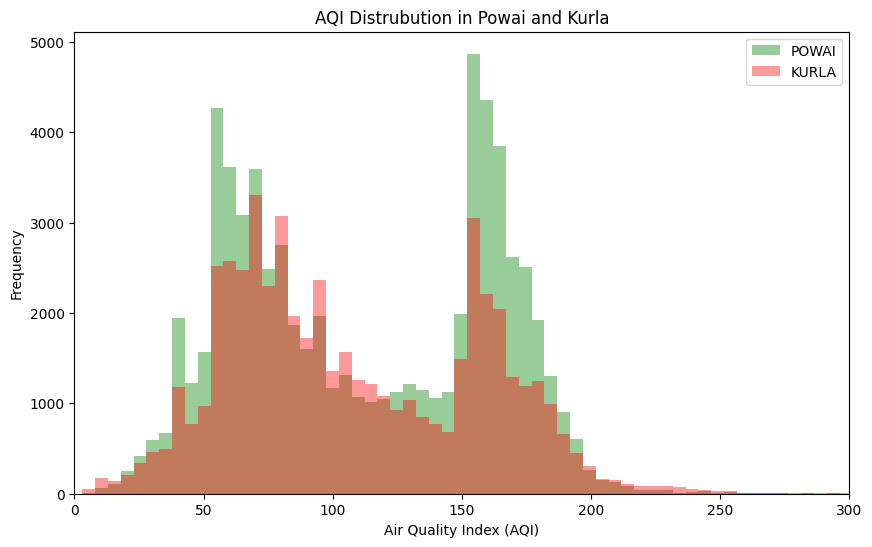

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df_powai['AQI'], bins=100, alpha = 0.4,color = 'green')
plt.hist(df_kurla['AQI'], bins=100,alpha = 0.4, color = 'red')
plt.title('AQI Distrubution in Powai and Kurla')
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Frequency')
plt.legend(["POWAI","KURLA"])
plt.xlim(0, 300) 
plt.show()

In [46]:
# Reading pollution data file for Bandra
file_path_bandra = 'archive\BandraKurlaComplexMumbaiIITM.csv'
df = pd.read_csv(file_path_bandra)
columns_to_drop_bandra = [0,-2,-1,-4,-6,-10,-11,-12,-13] 
df_bandra = df.drop(df.columns[columns_to_drop_bandra], axis=1)
print("SAMPLE DATA FOR BANDRA")
df_bandra.head()

SAMPLE DATA FOR BANDRA


From Date              To Date   PM2.5    PM10     NO    NO2  \
0  2021-01-01 00:00:00  2021-01-01 00:15:00  147.26  175.93  16.23  61.72   
1  2021-01-01 00:15:00  2021-01-01 00:30:00  145.37  173.96  16.88  61.50   
2  2021-01-01 00:30:00  2021-01-01 00:45:00  156.71  186.12  22.71  62.99   
3  2021-01-01 00:45:00  2021-01-01 01:00:00  171.18  205.41  16.55  59.13   
4  2021-01-01 01:00:00  2021-01-01 01:15:00  183.17  219.31  20.39  59.87   

     NOx    NH3    SO2    CO  Ozone     RH    WS      WD     BP     AT  
0  45.30  79.76   4.68  1.38   13.0  94.14  0.46  187.53  953.2  21.84  
1  45.75  79.01  18.49  1.38   15.0  94.99  0.47  224.11  953.2  21.84  
2  51.15  84.96  17.62  1.27   10.0  93.88  0.46  212.47  953.2  22.01  
3  44.19  77.83  18.14  1.23   12.0  93.38  0.27  216.65  954.2  21.99  
4  47.66  81.63  18.69  1.24   14.0  92.44  0.17  103.12  954.9  22.04

In [47]:
# Calculating Yearwise Sample means and Sample Standard deviations
df_bandra['From Date'] = pd.to_datetime(df['From Date'])
df_bandra['Year'] = df_bandra['From Date'].dt.year
mean_aqi_by_year = df_bandra.groupby('Year')['PM2.5'].mean()

PM25_YearWise_Means = []

for i in mean_aqi_by_year:
    PM25_YearWise_Means.append(i)

num_rows_2021 = df_bandra[df_bandra['Year'] == 2021].shape[0]
num_rows_2022 = df_bandra[df_bandra['Year'] == 2022].shape[0]
num_rows_2023 = df_bandra[df_bandra['Year'] == 2023].shape[0]

std_2021 = df_bandra[df_bandra['Year'] == 2021]['PM2.5'].std(ddof=1)
std_2022 = df_bandra[df_bandra['Year'] == 2022]['PM2.5'].std(ddof=1)
std_2023 = df_bandra[df_bandra['Year'] == 2023]['PM2.5'].std(ddof=1)

## Hypothesis Testing 2 
### Random Variable PM2.5
#### Testing if average PM2.5 level were low in 2021 than 2022 becuase of covid pandemic using standard normal test for differences


#### Null Hypothesis   H0 : µx - µy <= 0 versus 
#### Alternate Hypothesis H1 : µx - µy > 0

<p> Significannce level 0.05 

In [48]:
# Calculate Sample Means 
Sample_Mean_PM25_2021 = PM25_YearWise_Means[0]
Sample_Mean_PM25_2022 = PM25_YearWise_Means[1]

print(Sample_Mean_PM25_2021,Sample_Mean_PM25_2022)

## As n and m are large we can approximate the distribution of unknown and unequal variances as a Z distribution
# Calculate the test statistic TS
TS = (Sample_Mean_PM25_2021 - Sample_Mean_PM25_2022)/(np.sqrt((std_2021**2)/num_rows_2021 + (std_2023**2)/num_rows_2022))
print("Test Statistic Value: ",TS)
Significance_alpha = 0.05
confidence = 1 - Significance_alpha

# finding Z value corresponding to the required N and alpha
z_value = stats.norm.ppf(confidence)
print("Value of Z alpha: ",z_value)

54.027802819315305 59.79770811921891
Test Statistic Value:  -9.636645459553387
Value of Z alpha:  1.6448536269514722


#### As value of TS is less than Z alpha we fail to reject the Null Hypothesis or in other words we accept the Null Hypothesis and indeed from data we confirm that PM2.5 level in 2021 were lower than that in 2022 because of reduced transportation and manufacturing activities

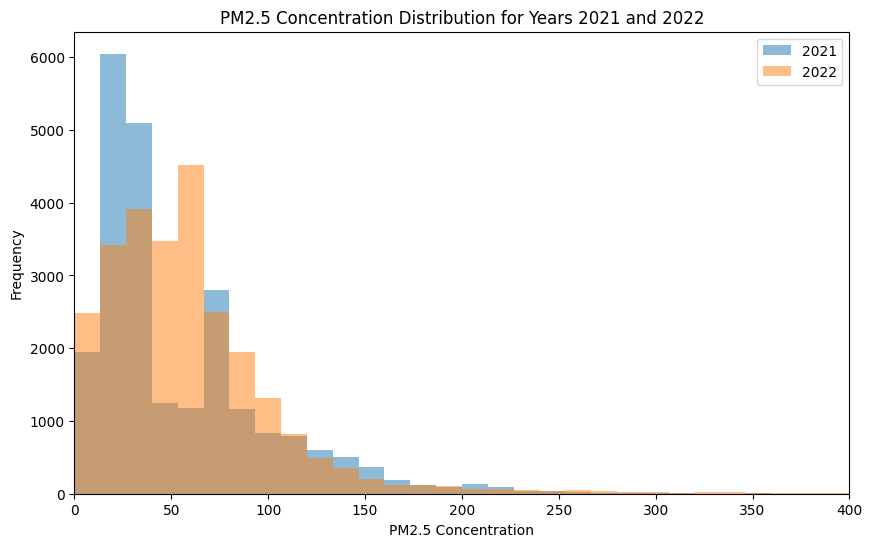

In [49]:
plt.figure(figsize=(10, 6))

df_2021 = df_bandra[df_bandra['Year'] == 2021]
df_2022 = df_bandra[df_bandra['Year'] == 2022]
plt.hist(df_2021['PM2.5'], bins=30, alpha=0.5, label='2021', range=(0, 400))
plt.hist(df_2022['PM2.5'], bins=30, alpha=0.5, label='2022', range=(0, 400))

plt.title('PM2.5 Concentration Distribution for Years 2021 and 2022')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 400)  
plt.show()

## Hypothesis Testing 3
### Random Variables Winf Speed & AQI
#### Higher wind speed is related to decreased(improved) levels of AQI

In [50]:
directory = "archive"

# List to store DataFrames
dfs = []

# Iterate over files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Read CSV file into a DataFrame
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)

# Concatenate DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.dropna(subset = ['WS'] , inplace = True)
combined_df.drop(columns = 'Unnamed: 0', inplace= True)
combined_df.set_index(pd.RangeIndex(start=0, stop=len(combined_df)), inplace=True)
print(combined_df)

                  From Date              To Date   PM2.5    PM10     NO  \
0       2021-01-01 00:00:00  2021-01-01 00:15:00  147.26  175.93  16.23   
1       2021-01-01 00:15:00  2021-01-01 00:30:00  145.37  173.96  16.88   
2       2021-01-01 00:30:00  2021-01-01 00:45:00  156.71  186.12  22.71   
3       2021-01-01 00:45:00  2021-01-01 01:00:00  171.18  205.41  16.55   
4       2021-01-01 01:00:00  2021-01-01 01:15:00  183.17  219.31  20.39   
...                     ...                  ...     ...     ...    ...   
806231  2023-06-03 22:45:00  2023-06-03 23:00:00   94.00  144.00   7.63   
806232  2023-06-03 23:00:00  2023-06-03 23:15:00   81.73  143.33   9.71   
806233  2023-06-03 23:15:00  2023-06-03 23:30:00   78.00  138.00  10.57   
806234  2023-06-03 23:30:00  2023-06-03 23:45:00   78.00  138.00  10.78   
806235  2023-06-03 23:45:00  2023-07-03 00:00:00   78.00  138.00  12.36   

          NO2    NOx    NH3    SO2    CO  ...    WS      WD  SR       BP  \
0       61.72  45.30  7

In [51]:
# Calculating AQI for overall data
AQI_total = []
pm25_total = combined_df['PM2.5']

for i in range(len(pm25_total)):
    pm25_value = calculate_aqi(pm25_total[i])
    AQI_total.append(pm25_value)

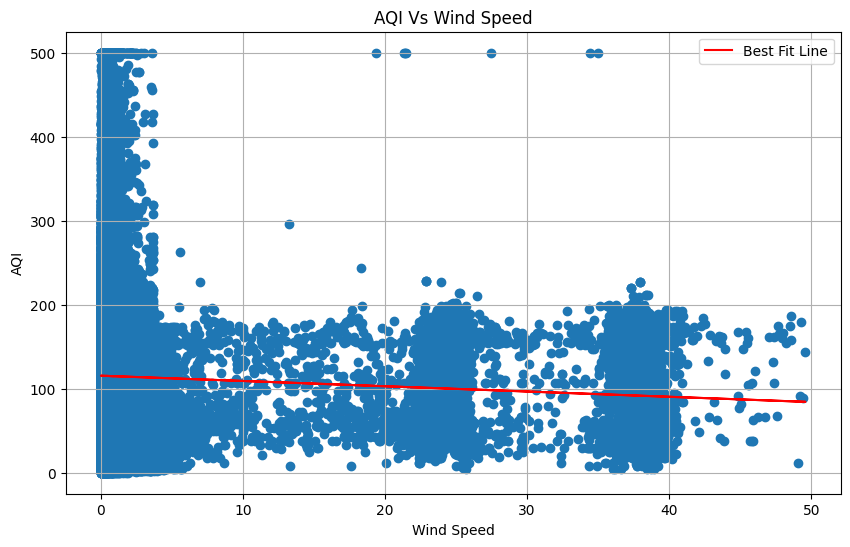

In [52]:

# Assuming x is a Pandas Series
x = combined_df['WS']
x = np.array(x)
y = np.array(AQI_total)

y = pd.to_numeric(y, errors='coerce')

# Remove NaN values from x and corresponding values from y
combined_df_clean = combined_df.dropna(subset=['WS'])
x_clean = combined_df_clean['WS'].values.reshape(-1, 1)

# Filter out NaN values from both x and y
nan_indices_x = np.isnan(x)
nan_indices_y = np.isnan(y)
nan_indices = nan_indices_x | nan_indices_y
x_clean = x[~nan_indices].reshape(-1, 1)
y_clean = y[~nan_indices]

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the clean data
model.fit(x_clean, y_clean)

# Get the best fit line
best_fit_line = model.predict(x_clean)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_clean, best_fit_line, color='red', linestyle='-')      # plot Best fit
plt.legend(["Best Fit Line"])
plt.grid(True)
plt.scatter(x_clean, y_clean)

plt.xlabel('Wind Speed')
plt.ylabel('AQI')
plt.title("AQI Vs Wind Speed")

plt.show()

#### As is clear from the graph, the AQI decreases with increasing Wind Speed. But after a certain value, the AQI seems to become constant.

## Contribution
| Group Member Name| Contribution |
|-----------------|-----------------|
| Chaitanya Keshri    | Hypothesis Testing |
| Ayush Singh  | Hypothesis Testing   |
| Ayush Jha  | Analysis of Data |
| Aryaman Pillai  | Analysis of Data  |
| Anushka Verma   |  Visualisation of Data  |
| Arhat Gedam | Visualisation of Data |

